In [2]:
# Importing the libraries
import datetime as dt
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


C:\Users\care2\AppData\Local\Temp\ipykernel_18064\254440947.py:5: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [3]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\care2\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
#Load the dataset
df=pd.read_excel("C:\\Users\\care2\\OneDrive\\Desktop\\Online Retail.xlsx")

In [5]:
pip install openpyxl


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\care2\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
#checking top 5 rows of dataset
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [7]:
#checking bottom 5 rows of dataset
df.tail()

InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID Country  
541904 2011-12-09 12:50:00       0.85     12680.0  France  
541905 2011-12-09 12:50:00       2.10     12680.0  France  
541906 2011-12-09 12:50:00       4.15     12680.0  France  
541907 2011-12-09 12:50:00       4.15     12680.0  France  
541908 2011-12-09 12:50:00       4.95     12680.0  France

In [8]:
#checking shape of dataset
df.shape

(541909, 8)

In [9]:
#basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [10]:
#columns of dataset
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

Data Cleaning - 
Checking for null values

In [11]:
#checking for null values in dataset
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

*Here we have null values present in our dataset like in CustomerID and Description.we can drop thode null values in customerID columns as we are making customer segmentation and keeping those null values make no sense*

In [12]:
#dropping null values
df.dropna(inplace=True)

In [13]:
#checking for missing values
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [14]:
#Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [15]:
#checking shape
df.shape

(406829, 8)

*After removing null value from our dataset.*

*Now we have 406829 rows and 8 columns in our dataset.*

In [16]:
#changing datatype
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [17]:
df=df[~df['InvoiceNo'].str.contains('C')]

*Here we dropped some InvoiceNo which starts with 'c' because 'c' indicates a cancellation.*

In [18]:
df.shape

(397924, 8)

In [19]:
#checking summary
df.describe()

Quantity                    InvoiceDate      UnitPrice  \
count  397924.000000                         397924  397924.000000   
mean       13.021823  2011-07-10 23:43:36.912475648       3.116174   
min         1.000000            2010-12-01 08:26:00       0.000000   
25%         2.000000            2011-04-07 11:12:00       1.250000   
50%         6.000000            2011-07-31 14:39:00       1.950000   
75%        12.000000            2011-10-20 14:33:00       3.750000   
max     80995.000000            2011-12-09 12:50:00    8142.750000   
std       180.420210                            NaN      22.096788   

          CustomerID  
count  397924.000000  
mean    15294.315171  
min     12346.000000  
25%     13969.000000  
50%     15159.000000  
75%     16795.000000  
max     18287.000000  
std      1713.169877

Exploratory data analysis

Description Name

In [20]:
Description_df=df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Description_Name'}, inplace=True)
Description_df.rename(columns={'index': 'Count'}, inplace=True)
#top 5 Description Name
Description_df.head()

Description  count
0  WHITE HANGING HEART T-LIGHT HOLDER   2028
1            REGENCY CAKESTAND 3 TIER   1724
2             JUMBO BAG RED RETROSPOT   1618
3       ASSORTED COLOUR BIRD ORNAMENT   1408
4                       PARTY BUNTING   1397

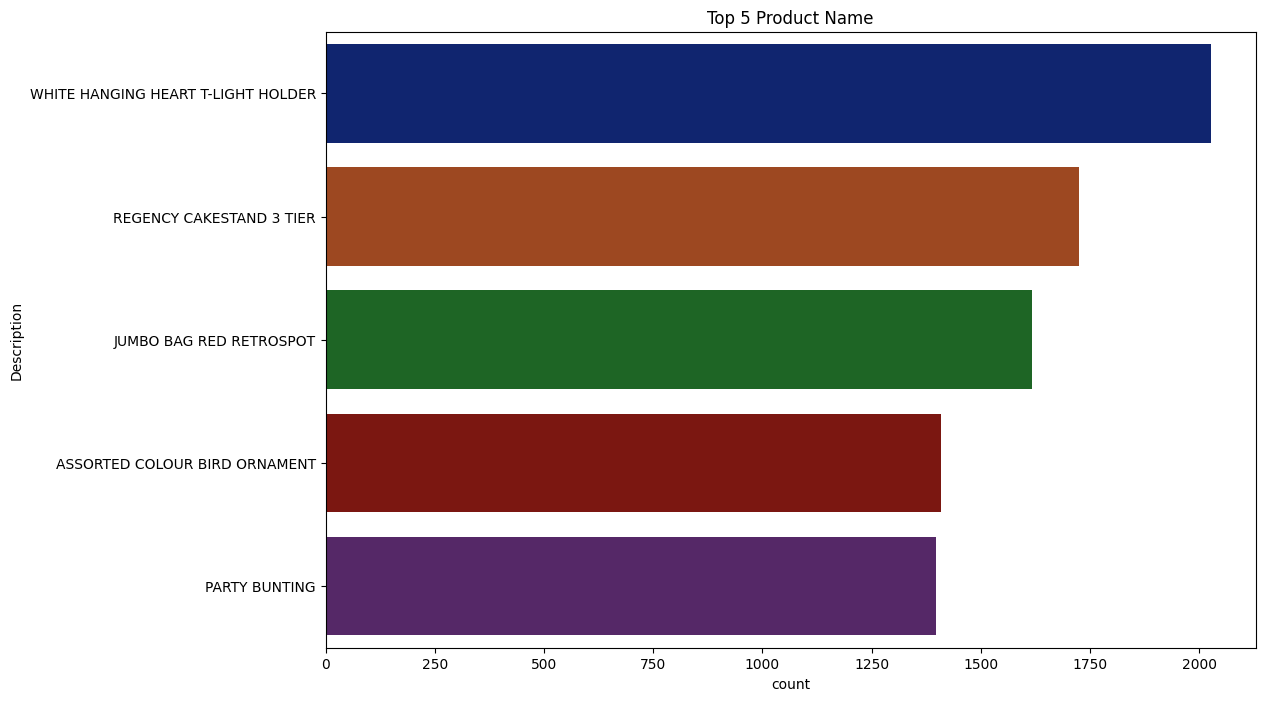

In [21]:
#plot top 5 product name
plt.figure(figsize=(12,8))
plt.title('Top 5 Product Name')
sns.barplot(x='count',y='Description',data=Description_df[:5], palette='dark');

Top product based on maximum selling are :

1.WHITE HANGING HEART T-LIGHT HOLDER

2.REGENCY CAKESTAND 3 TIER

3.JUMBO BAG RED RETROSPOT

4.PARTY BUNTING

5.LUNCH BAG RED RETROSPOT

In [22]:
#bottom 5 description name
Description_df.tail()

Description  count
3872      RUBY GLASS CLUSTER EARRINGS      1
3873   PINK CHRYSANTHEMUMS ART FLOWER      1
3874  72 CAKE CASES VINTAGE CHRISTMAS      1
3875     WALL ART , THE MAGIC FOREST       1
3876      PAPER CRAFT , LITTLE BIRDIE      1

Bottom 5 Product based on the selling are:

RUBY GLASS CLUSTER EARRINGS

PINK CHRYSANTHEMUMS ART FLOWER

72 CAKE CASES VINTAGE CHRISTMAS

WALL ART , THE MAGIC FOREST

PAPER CRAFT , LITTLE BIRDIE

StockCode Name

In [23]:
StockCode_df=df['StockCode'].value_counts().reset_index()
StockCode_df.rename(columns={'index': 'StockCode_Name'}, inplace=True)
StockCode_df.rename(columns={'index': 'Count'}, inplace=True)
#top 5 stockcode name
StockCode_df.head()

StockCode  count
0    85123A   2035
1     22423   1724
2    85099B   1618
3     84879   1408
4     47566   1397

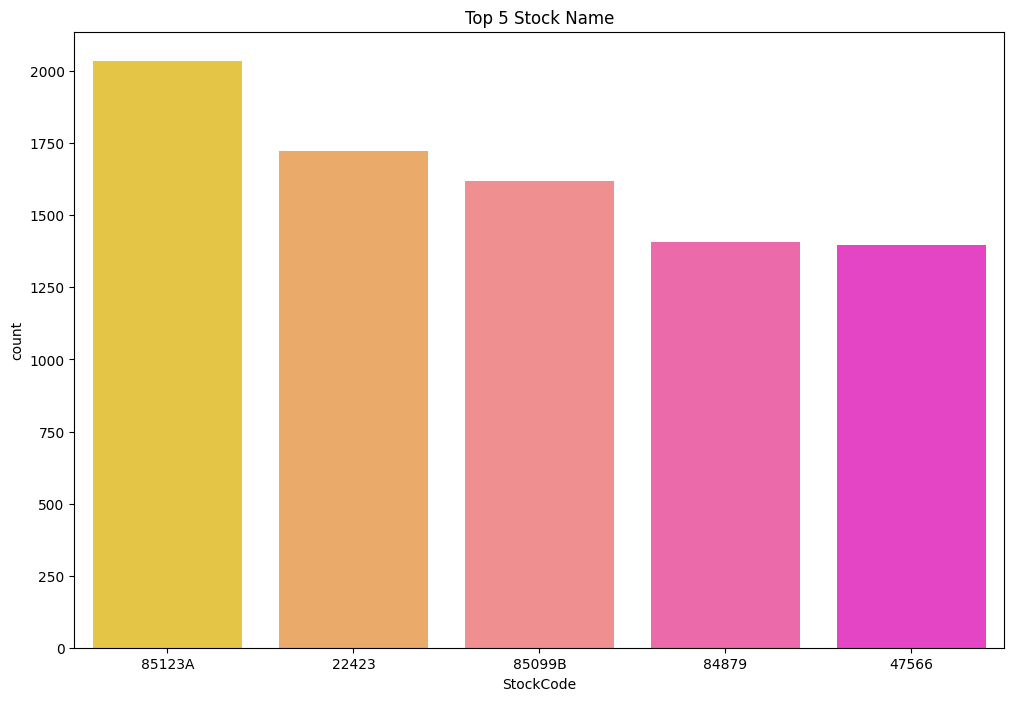

In [24]:
#plot top 5 stockcode name
plt.figure(figsize=(12,8))
plt.title('Top 5 Stock Name')
sns.barplot(x='StockCode',y='count',data=StockCode_df[:5], palette='spring_r');

Top 5 Stock name based on selling are :

1.85123A

2.22423

3.85099B

4.84879

5.4756

In [25]:
#bottom 5 stockcode name
StockCode_df.tail()

StockCode  count
3660     90168      1
3661     90169      1
3662    90202A      1
3663     90118      1
3664     23843      1

Country Name

In [26]:
country_df=df['Country'].value_counts().reset_index()
country_df.rename(columns={'index': 'Country'}, inplace=True)
country_df.rename(columns={'index': 'Count'}, inplace=True)
#top 5 country name
country_df.head()

Country   count
0  United Kingdom  354345
1         Germany    9042
2          France    8342
3            EIRE    7238
4           Spain    2485

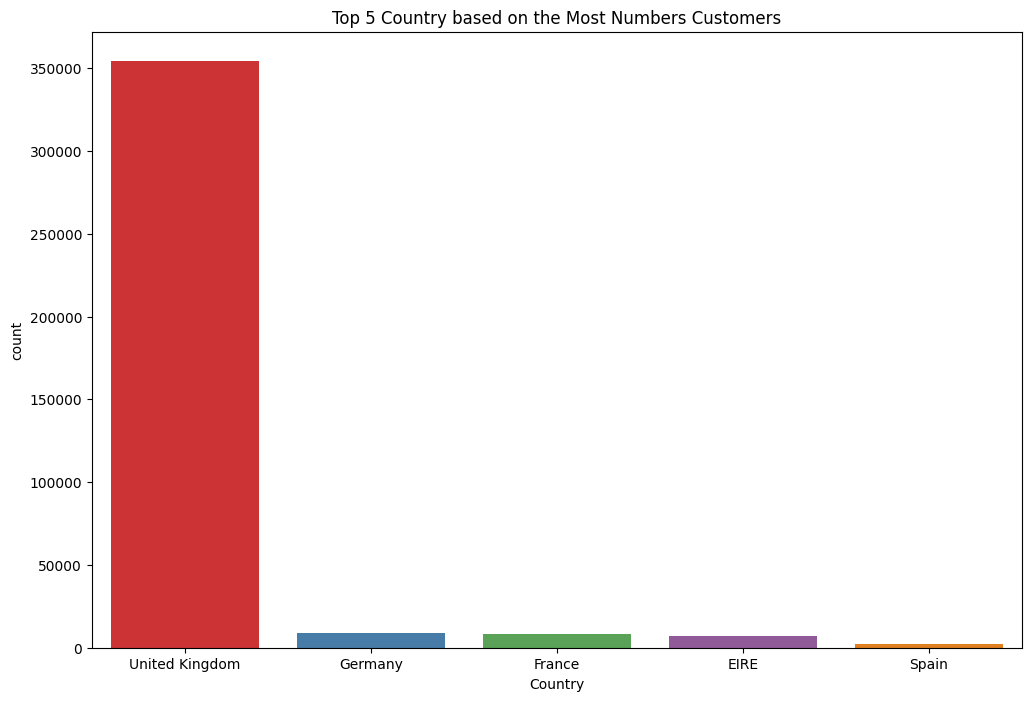

In [27]:
#plot top 5 country name
plt.figure(figsize=(12,8))
plt.title('Top 5 Country based on the Most Numbers Customers')
sns.barplot(x='Country',y='count',data=country_df[:5], palette='Set1');

*From this graph we can see that most of the customers are from United Kingdom that make sense aas company is from UK bases after that we have Germany ,France ,EIRE and Spain*

In [28]:
#bottom 5 country name
country_df.tail()

Country  count
32       Lithuania     35
33          Brazil     32
34  Czech Republic     25
35         Bahrain     17
36    Saudi Arabia      9

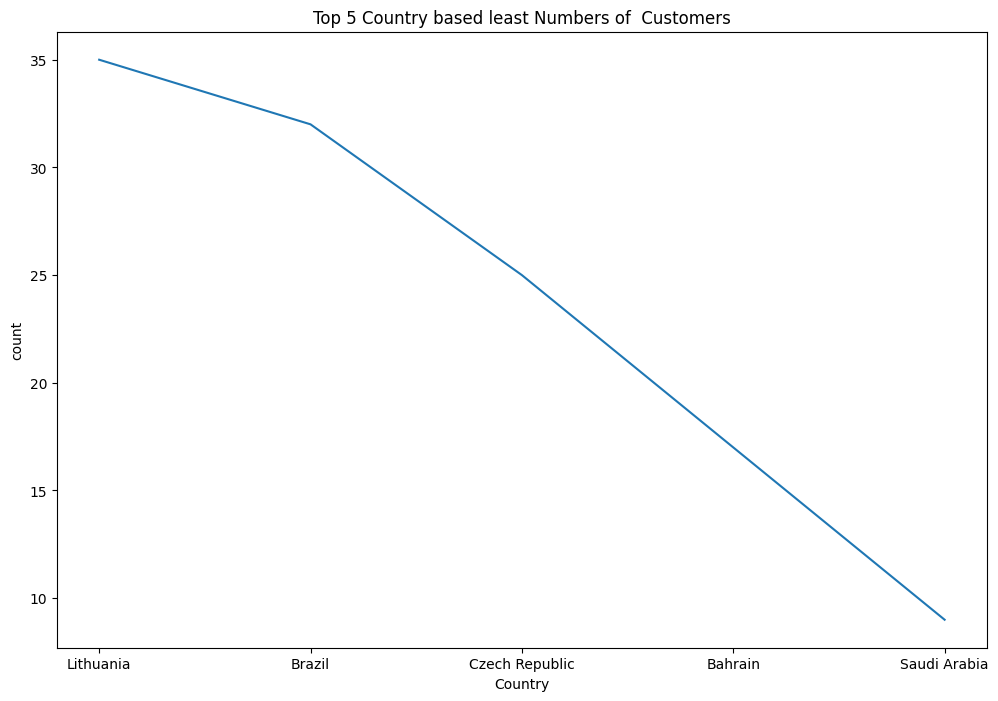

In [29]:
#plot bottom 5 country name
plt.figure(figsize=(12,8))
plt.title('Top 5 Country based least Numbers of  Customers')
sns.lineplot(x='Country',y='count',data=country_df[-5:]);

*From this graph we can see that least number of customers from Lithuania,Brazil, Czech Republic ,Bahrain and Saudi Arabia*

Distribution of Quantity

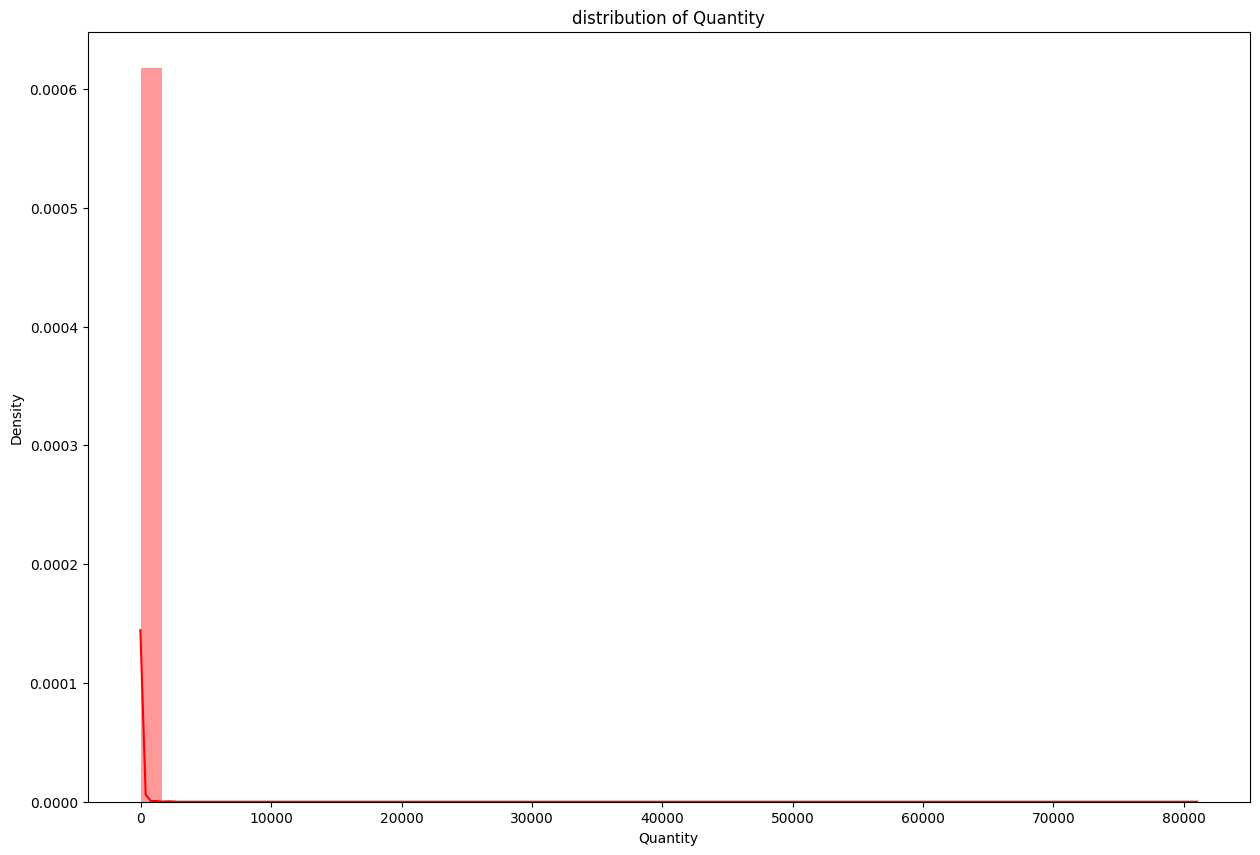

In [30]:
#distribution of Quantity
plt.figure(figsize=(15,10))
plt.title('distribution of Quantity')
sns.distplot(df['Quantity'],color="r");

*Here we can see that its a Positively skewed (or right-skewed) distribution. It is a type of distribution in which most values are clustered around the left tail of the distribution*

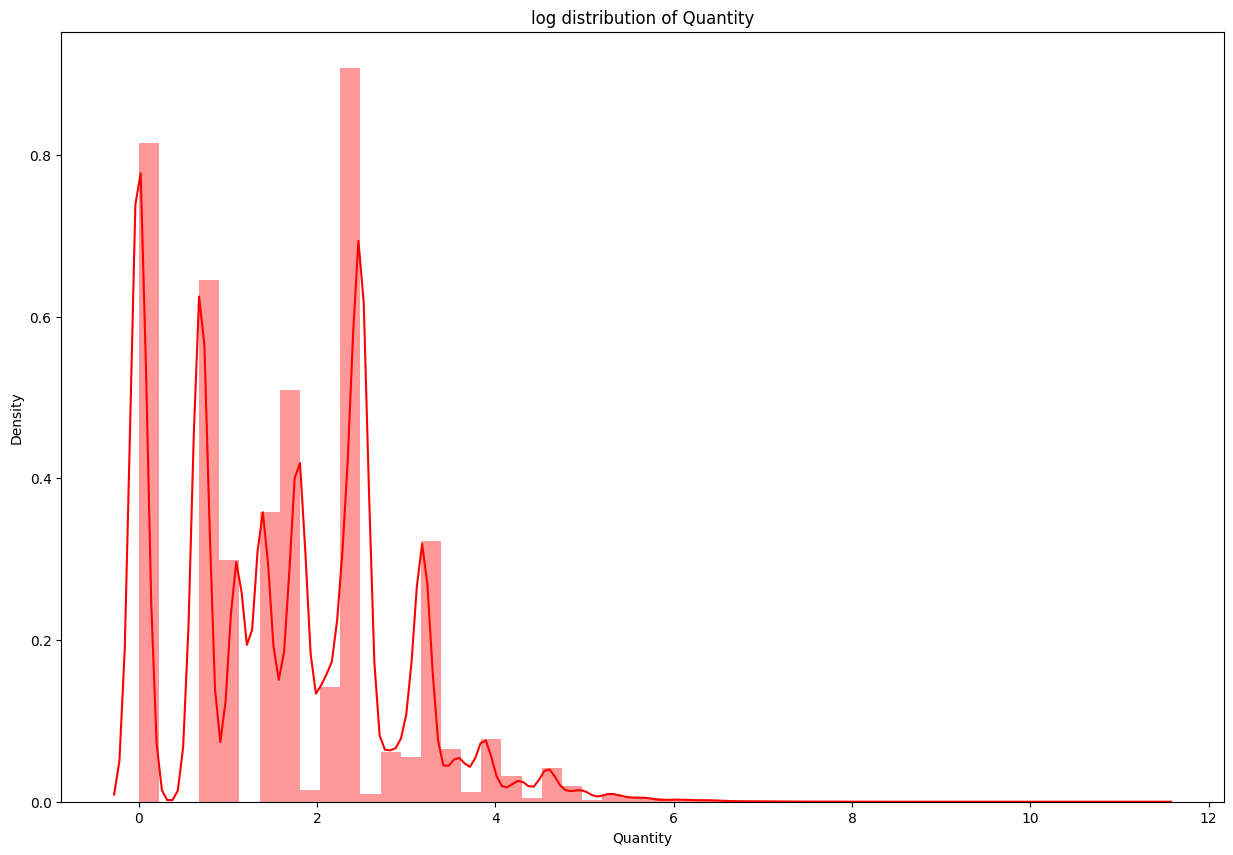

In [31]:
#transforming skewed distribution to symmetrical distribution
plt.figure(figsize=(15,10))
plt.title('log distribution of Quantity')
sns.distplot(np.log(df['Quantity']),color="r");

Distribution of Unit Price

<Axes: title={'center': 'UnitPrice distribution'}, xlabel='UnitPrice', ylabel='Density'>

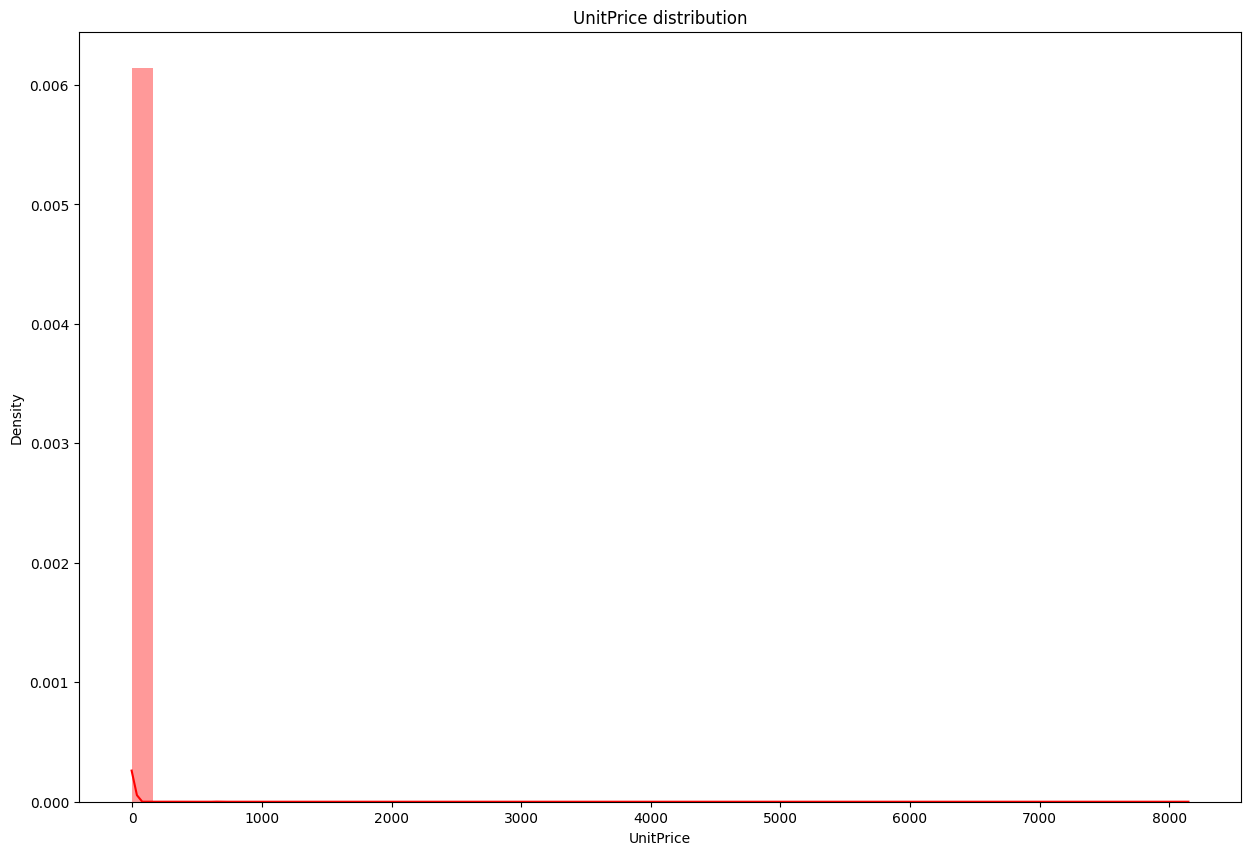

In [32]:
#distribution of unit price
plt.figure(figsize=(15,10))
plt.title('UnitPrice distribution')
sns.distplot(df['UnitPrice'],color="r")

*From the distribution of unit price, we can say that most items have a lower price range.*

In [33]:
#checking for unit price less than 0
df[df['UnitPrice']<0]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

Feature engineering

In [34]:
#Converting InvoiceDate columns into date time format
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

In [35]:
#Creating a new features from Invoicedate
df['Month']=df['InvoiceDate'].dt.month_name()
df['Day']=df['InvoiceDate'].dt.day_name()
df['Hour']=df['InvoiceDate'].dt.hour


In [36]:
#Creating a new feature TotalAmount from product of Quantity and Unitprice
df['TotalAmount']=df['Quantity']*df['UnitPrice']

In [37]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country     Month  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  December   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  December   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  December   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  December   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  December   

         Day  Hour  TotalAmount  
0  Wednesday     8        15.30  
1  Wednesday     8        20.34  
2  Wednesday     8        22.00  
3  Wednesday     8        20.34  
4  Wednesday     8        20.34

Distribution of total amount

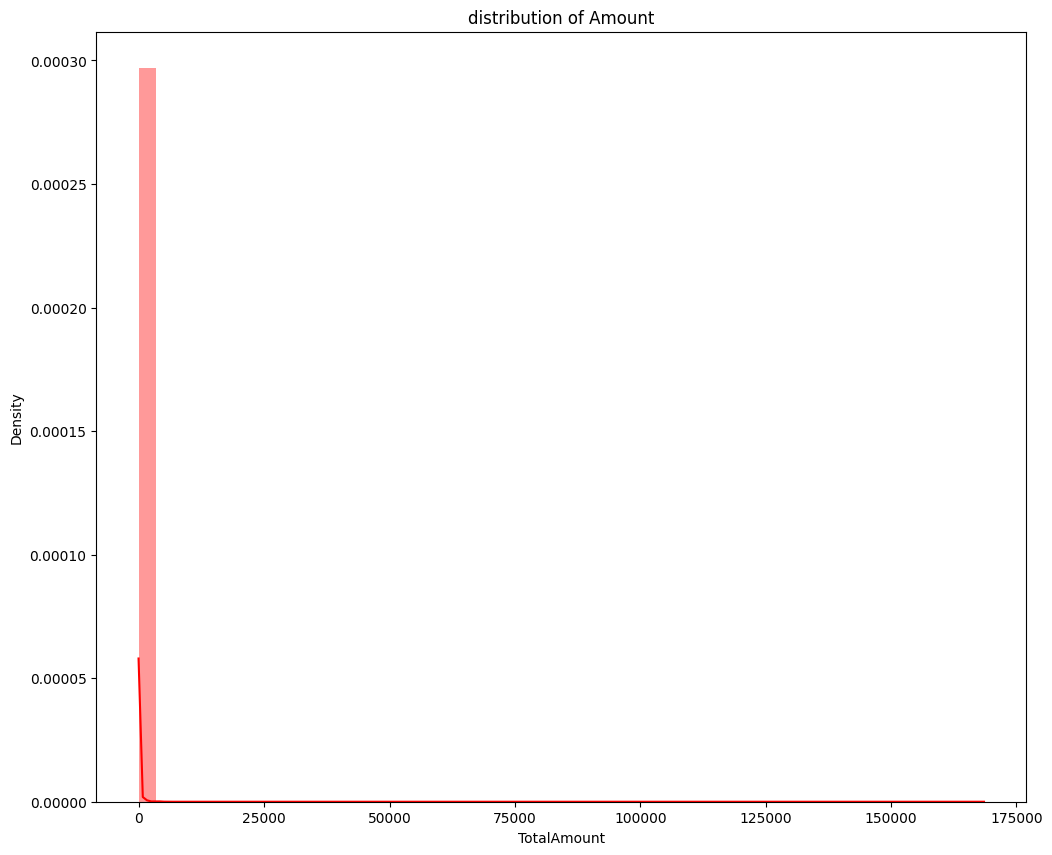

In [38]:
#checking distribution for Totalamount
plt.figure(figsize=(12,10))
plt.title('distribution of Amount')
sns.distplot(df['TotalAmount'],color="r");

Months

In [39]:
#creating month dataframe
month_df=df['Month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'Month': 'Count'}, inplace=True)
month_df

Count  count
0    November  64545
1     October  49557
2    December  43464
3   September  40030
4         May  28322
5        June  27185
6       March  27177
7      August  27013
8        July  26827
9       April  22644
10    January  21232
11   February  19928

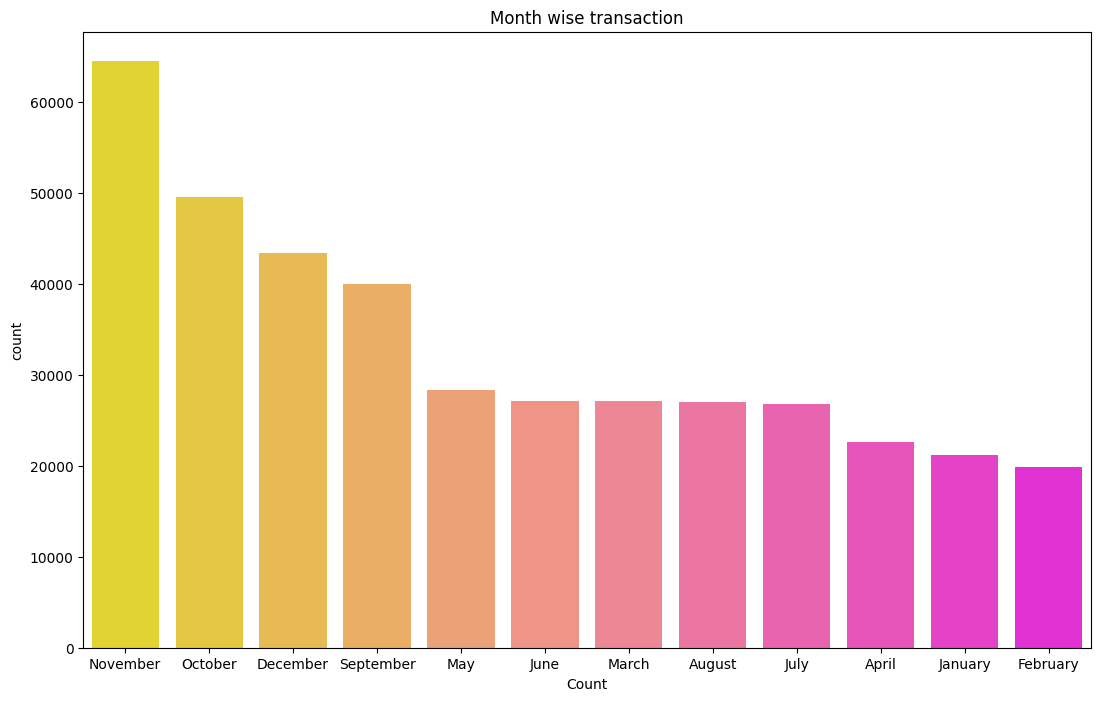

In [40]:
#plotting for month
plt.figure(figsize=(13,8))
plt.title('Month wise transaction')
sns.barplot(x='Count',y='count',data=month_df,palette='spring_r');

♦ *Most numbers of customers have purchased the gifts in the month of November, October and December.As we all know they have festive season in end of the year as well new year to celebrate so we have highest numbers of transaction in november, october, december as company have most of the customer wholesales who are keeping stocks for festive season.*

♦ *Least numbers of purchasing are in the month of January and February.*

Days

In [41]:
#creating day dataframe
day_df=df['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)
day_df.rename(columns={'Day': 'Count'}, inplace=True)
day_df

Count  count
0   Thursday  80052
1  Wednesday  68888
2    Tuesday  66476
3     Monday  64899
4     Sunday  62775
5     Friday  54834

ValueError: Could not interpret value `Day` for `x`. An entry with this name does not appear in `data`.

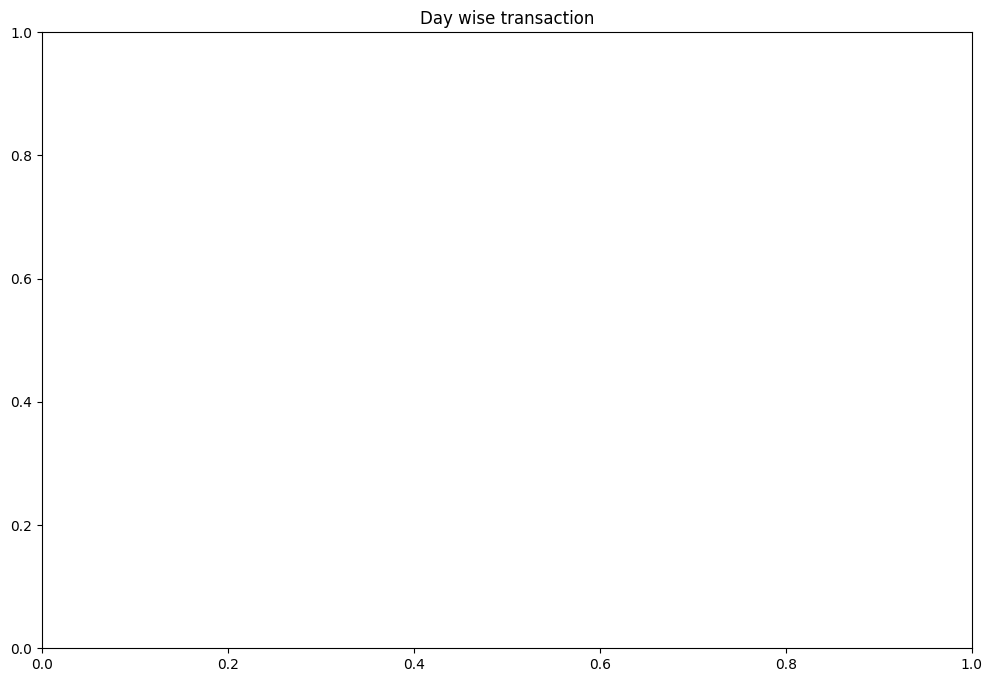

In [42]:
#plotting for days
plt.figure(figsize=(12,8))
plt.title('Day wise transaction')
sns.barplot(x='Day',y='count',data=day_df, palette='pastel');

We can see the maximum number of transaction are for thursday but we can also see there are no transaction on saturday at this point I have no idea why but there can be reasons porbably data is not availble for saturdays or no transactions happened on saturday.

Most of the customers have purchased the items in Thursday ,Wednesday and Tuesday.

Hour

In [ ]:
#Creating hour dataframe
hour_df=df['Hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hours'}, inplace=True)
hour_df.rename(columns={'index': 'Count'}, inplace=True)
hour_df

Hour  count
0     12  72069
1     13  64031
2     14  54127
3     11  49092
4     15  45372
5     10  37999
6     16  24093
7      9  21945
8     17  13072
9      8   8691
10    19   3322
11    18   2929
12    20    802
13     7    379
14     6      1

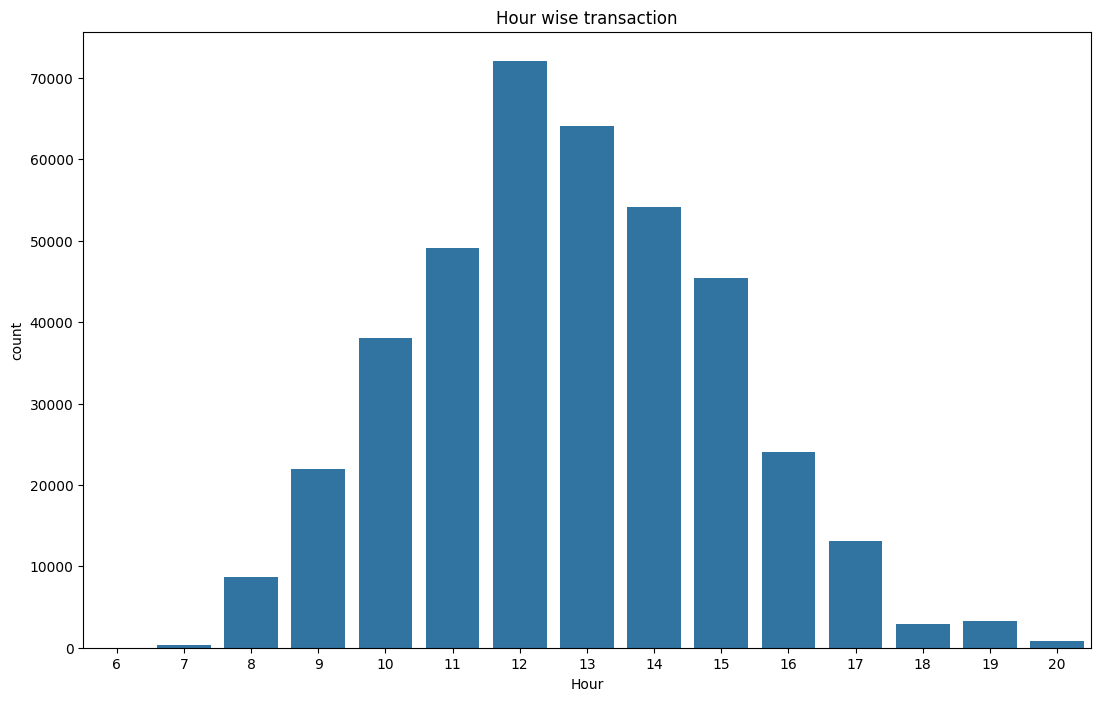

In [ ]:
#plotting for hour
plt.figure(figsize=(13,8))
plt.title('Hour wise transaction')
sns.barplot(x='Hour',y='count',data=hour_df);

From the above graph we can say that most numbers of purchasing is done between 12pm clock to 3pm.

In [ ]:
#dividing hours into morning, afternoon and evening
def time_type(time):
  if(time>=6 and time<=11):
    return 'Morning'
  elif(time>=12 and time<=17):
    return 'Afternoon'
  else:
    return 'Evening'

In [ ]:
#applying function we created on hour column
df['Time_type']=df['Hour'].apply(time_type)

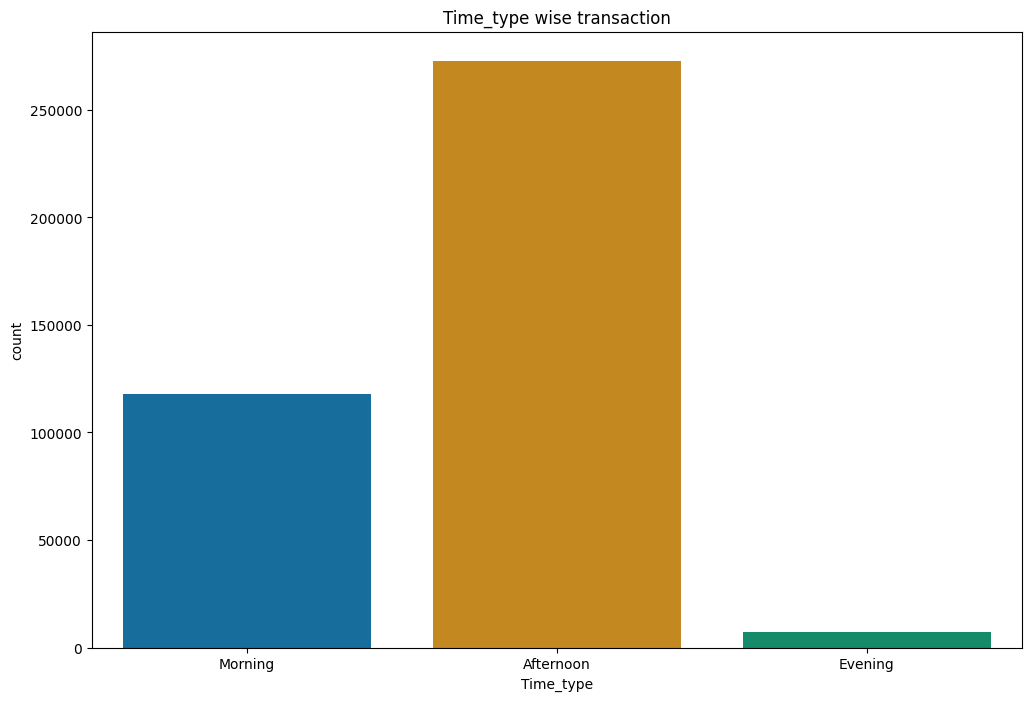

In [ ]:
#plotting for time type
plt.figure(figsize=(12,8))
plt.title('Time_type wise transaction')
sns.countplot(x='Time_type',data=df, palette='colorblind');


In [ ]:
cohort_data = df[['InvoiceNo','StockCode','Description','Quantity','InvoiceDate','UnitPrice','CustomerID','Country']]
cohort_data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [ ]:
all_dates = (pd.to_datetime(cohort_data['InvoiceDate'])).apply(lambda x:x.date())
(all_dates.max() - all_dates.min()).days
# Start and end dates:
print('Start date: {}'.format(all_dates.min()))
print('End date: {}'.format(all_dates.max()))

Start date: 2010-12-01
End date: 2011-12-09


In [ ]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

cohort_data['InvoiceMonth'] = cohort_data['InvoiceDate'].apply(get_month)
grouping = cohort_data.groupby('CustomerID')['InvoiceMonth']
cohort_data['CohortMonth'] = grouping.transform('min')
cohort_data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country InvoiceMonth  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   2010-12-01   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   2010-12-01   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   2010-12-01   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   2010-12-01   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   2010-12-01   

  CohortMonth  
0  2010-12-01  
1  2010-12-01  
2  2010-12-01  
3  2010-12-01  
4  2010-12-01

In [ ]:
def get_date_int(df, column):    
    year = df[column].dt.year    
    month = df[column].dt.month    
    day = df[column].dt.day
    return year, month, day
invoice_year, invoice_month, _ = get_date_int(cohort_data, 'InvoiceMonth') 
cohort_year, cohort_month, _ = get_date_int(cohort_data, 'CohortMonth')
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month
cohort_data['CohortIndex'] = years_diff * 12 + months_diff
cohort_data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country InvoiceMonth  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   2010-12-01   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   2010-12-01   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   2010-12-01   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   2010-12-01   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   2010-12-01   

  CohortMonth  CohortIndex  
0  2010-12-01            0  
1  2010-12-01            0  
2  2010-12-01            0  
3  2010-12-01            0  
4  2010-12-01            0

In [ ]:
grouping = cohort_data.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='CustomerID')
cohort_counts

CohortIndex     0      1      2      3      4      5      6      7      8   \
CohortMonth                                                                  
2010-12-01   885.0  324.0  286.0  340.0  321.0  352.0  321.0  309.0  313.0   
2011-01-01   417.0   92.0  111.0   96.0  134.0  120.0  103.0  101.0  125.0   
2011-02-01   380.0   71.0   71.0  108.0  103.0   94.0   96.0  106.0   94.0   
2011-03-01   452.0   68.0  114.0   90.0  101.0   76.0  121.0  104.0  126.0   
2011-04-01   300.0   64.0   61.0   63.0   59.0   68.0   65.0   78.0   22.0   
2011-05-01   284.0   54.0   49.0   49.0   59.0   66.0   75.0   27.0    NaN   
2011-06-01   242.0   42.0   38.0   64.0   56.0   81.0   23.0    NaN    NaN   
2011-07-01   188.0   34.0   39.0   42.0   51.0   21.0    NaN    NaN    NaN   
2011-08-01   169.0   35.0   42.0   41.0   21.0    NaN    NaN    NaN    NaN   
2011-09-01   299.0   70.0   90.0   34.0    NaN    NaN    NaN    NaN    NaN   
2011-10-01   358.0   86.0   41.0    NaN    NaN    NaN    NaN    NaN    NaN   
2011-11-01   324.0   36.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011-12-01    41.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

CohortIndex     9      10     11     12  
CohortMonth                              
2010-12-01   350.0  331.0  445.0  235.0  
2011-01-01   136.0  152.0   49.0    NaN  
2011-02-01   116.0   26.0    NaN    NaN  
2011-03-01    39.0    NaN    NaN    NaN  
2011-04-01     NaN    NaN    NaN    NaN  
2011-05-01     NaN    NaN    NaN    NaN  
2011-06-01     NaN    NaN    NaN    NaN  
2011-07-01     NaN    NaN    NaN    NaN  
2011-08-01     NaN    NaN    NaN    NaN  
2011-09-01     NaN    NaN    NaN    NaN  
2011-10-01     NaN    NaN    NaN    NaN  
2011-11-01     NaN    NaN    NaN    NaN  
2011-12-01     NaN    NaN    NaN    NaN

In [ ]:
cohort_sizes = cohort_counts.iloc[:,0]

# Divide all values in the cohort_counts table by cohort_sizes
retention = cohort_counts.divide(cohort_sizes, axis=0)

# Review the retention table
retention.round(3) * 100
retention

CohortIndex   0         1         2         3         4         5         6   \
CohortMonth                                                                    
2010-12-01   1.0  0.366102  0.323164  0.384181  0.362712  0.397740  0.362712   
2011-01-01   1.0  0.220624  0.266187  0.230216  0.321343  0.287770  0.247002   
2011-02-01   1.0  0.186842  0.186842  0.284211  0.271053  0.247368  0.252632   
2011-03-01   1.0  0.150442  0.252212  0.199115  0.223451  0.168142  0.267699   
2011-04-01   1.0  0.213333  0.203333  0.210000  0.196667  0.226667  0.216667   
2011-05-01   1.0  0.190141  0.172535  0.172535  0.207746  0.232394  0.264085   
2011-06-01   1.0  0.173554  0.157025  0.264463  0.231405  0.334711  0.095041   
2011-07-01   1.0  0.180851  0.207447  0.223404  0.271277  0.111702       NaN   
2011-08-01   1.0  0.207101  0.248521  0.242604  0.124260       NaN       NaN   
2011-09-01   1.0  0.234114  0.301003  0.113712       NaN       NaN       NaN   
2011-10-01   1.0  0.240223  0.114525       NaN       NaN       NaN       NaN   
2011-11-01   1.0  0.111111       NaN       NaN       NaN       NaN       NaN   
2011-12-01   1.0       NaN       NaN       NaN       NaN       NaN       NaN   

CohortIndex        7         8         9         10        11        12  
CohortMonth                                                              
2010-12-01   0.349153  0.353672  0.395480  0.374011  0.502825  0.265537  
2011-01-01   0.242206  0.299760  0.326139  0.364508  0.117506       NaN  
2011-02-01   0.278947  0.247368  0.305263  0.068421       NaN       NaN  
2011-03-01   0.230088  0.278761  0.086283       NaN       NaN       NaN  
2011-04-01   0.260000  0.073333       NaN       NaN       NaN       NaN  
2011-05-01   0.095070       NaN       NaN       NaN       NaN       NaN  
2011-06-01        NaN       NaN       NaN       NaN       NaN       NaN  
2011-07-01        NaN       NaN       NaN       NaN       NaN       NaN  
2011-08-01        NaN       NaN       NaN       NaN       NaN       NaN  
2011-09-01        NaN       NaN       NaN       NaN       NaN       NaN  
2011-10-01        NaN       NaN       NaN       NaN       NaN       NaN  
2011-11-01        NaN       NaN       NaN       NaN       NaN       NaN  
2011-12-01        NaN       NaN       NaN       NaN       NaN       NaN

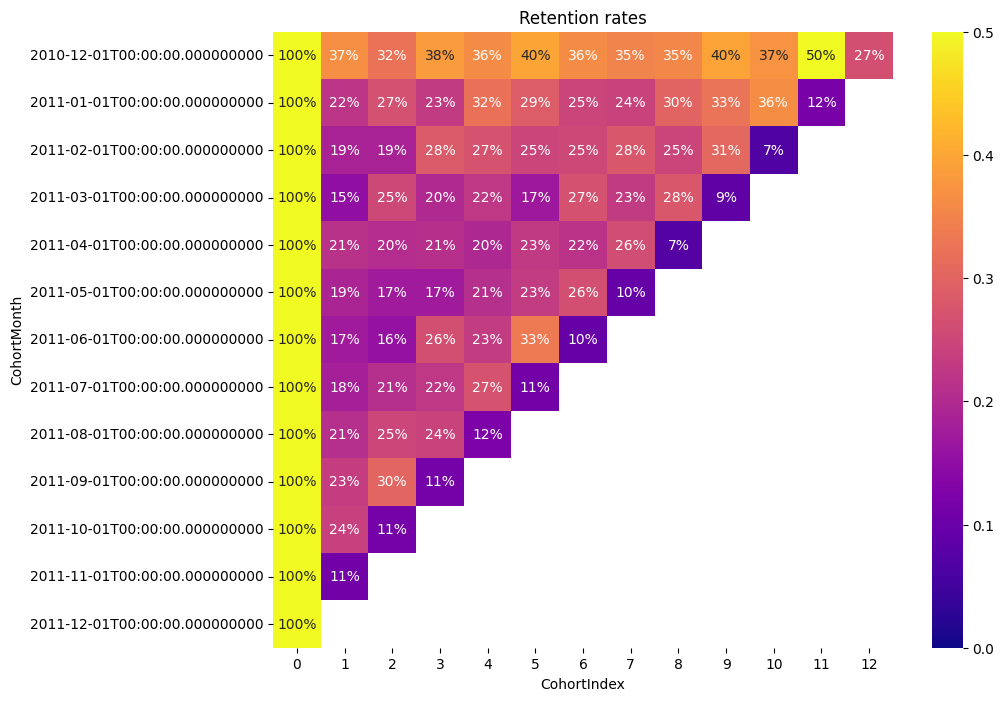

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Retention rates')
sns.heatmap(data = retention,annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap = 'plasma')
plt.show()

Create the RFM model (Recency, Frequency,Monetary value)

RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in retail and professional services industries.

RFM stands for the three dimensions:

Recency – How recently did the customer purchase?

Frequency – How often do they purchase?

Monetary – How much do they spend?
Recency - In order to find the recency value of each customer, we need to determine the last invoice date as the current date and subtract the last purchasing date of each customer from this date.

Frequency - In order to find the frequency value of each customer, we need to determine how many times the customers make purchases.

Monetary - In order to find the monetary value of each customer, we need to determine how much do the customers spend on purchases.

In [ ]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

CustomerID  Recency  Frequency  Monetary
0     12346.0      325          1  77183.60
1     12347.0        2        182   4310.00
2     12348.0       75         31   1797.24
3     12349.0       18         73   1757.55
4     12350.0      310         17    334.40

In [ ]:
#Descriptive Statistics (Recency)
rfm_df.Recency.describe()

count    4339.000000
mean       92.041484
std       100.007757
min         0.000000
25%        17.000000
50%        50.000000
75%       141.500000
max       373.000000
Name: Recency, dtype: float64

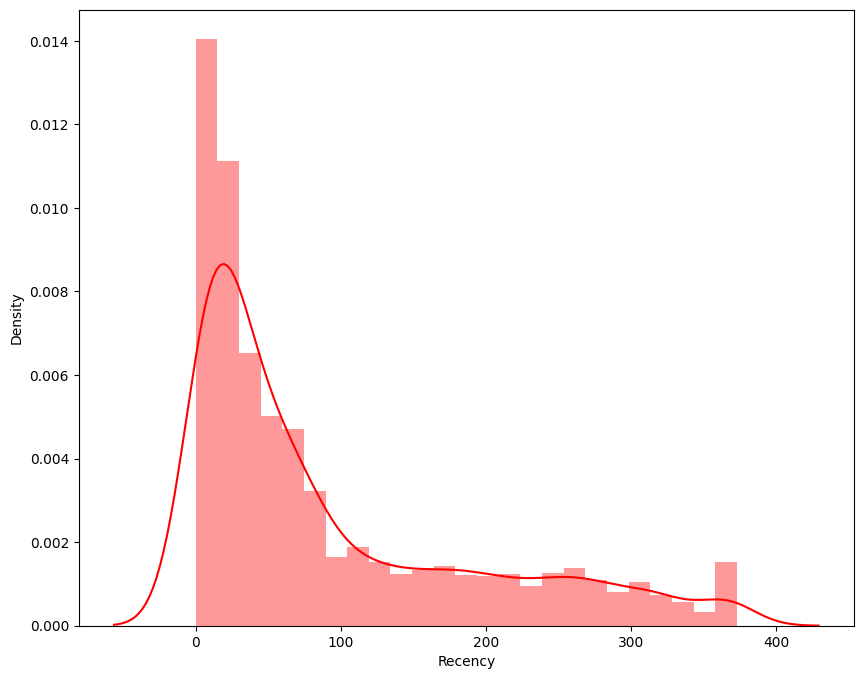

In [ ]:
#Recency distribution plot
import seaborn as sns
x = rfm_df['Recency']
plt.figure(figsize=(10,8))
sns.distplot(x,color='r');

In [ ]:
#Descriptive Statistics (Frequency)
rfm_df.Frequency.describe()

count    4339.000000
mean       91.708689
std       228.792852
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: Frequency, dtype: float64

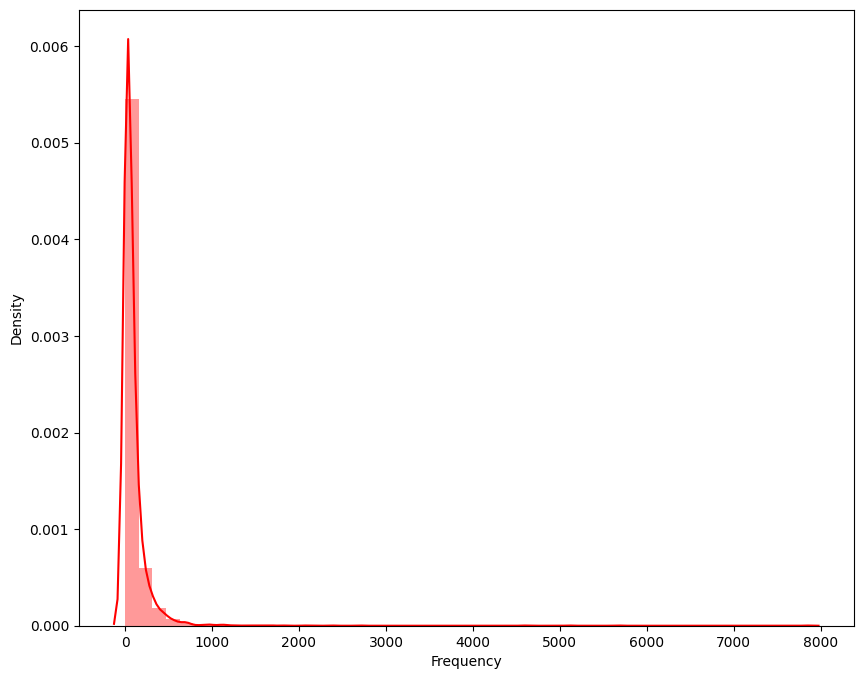

In [ ]:
#Frequency distribution plot, taking observations which have frequency less than 1000
import seaborn as sns
x = rfm_df['Frequency']
plt.figure(figsize=(10,8))
sns.distplot(x,color='r');

In [ ]:
#Descriptive Statistics (Monetary)
rfm_df.Monetary.describe()

count      4339.000000
mean       2053.793018
std        8988.248381
min           0.000000
25%         307.245000
50%         674.450000
75%        1661.640000
max      280206.020000
Name: Monetary, dtype: float64

<Axes: xlabel='Monetary', ylabel='Density'>

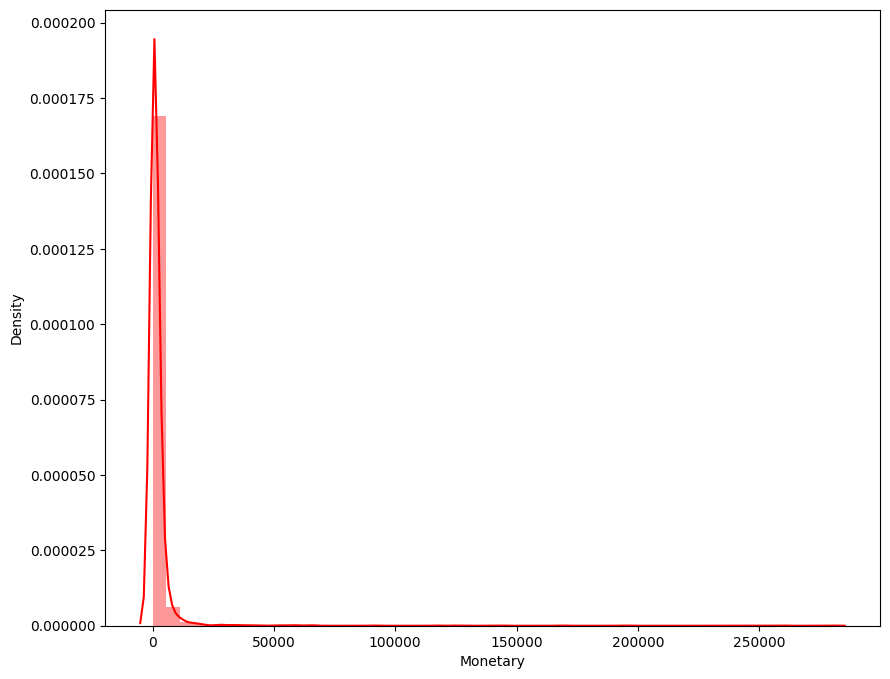

In [ ]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
import seaborn as sns
x = rfm_df['Monetary']
plt.figure(figsize=(10,8))
sns.distplot(x,color='r')

*From all the above graphs of Recency,Frequency and Monetary we can say that all are positively skewed distribution.*

Splitting into four segments using quantiles.

In [ ]:
#Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [ ]:
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 307.24499999999995, 0.5: 674.4499999999998, 0.75: 1661.64}}

In [ ]:
#Functions to create R, F and M segments according to quantiles for recency low score is important and for frequency and monetory maximum is important.
#so keeping this in mind we are creating two function to create scores
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

Recency  Frequency  Monetary  R  F  M
CustomerID                                       
12346.0         325          1  77183.60  4  4  1
12347.0           2        182   4310.00  1  1  1
12348.0          75         31   1797.24  3  3  1
12349.0          18         73   1757.55  2  2  1
12350.0         310         17    334.40  4  4  3

In [ ]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore
CustomerID                                                          
12346.0         325          1  77183.60  4  4  1      441         9
12347.0           2        182   4310.00  1  1  1      111         3
12348.0          75         31   1797.24  3  3  1      331         7
12349.0          18         73   1757.55  2  2  1      221         5
12350.0         310         17    334.40  4  4  3      443        11

In [ ]:
#Handling negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Applying handle_neg_n_zero function to Recency and Monetary columns 
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

#Performing Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

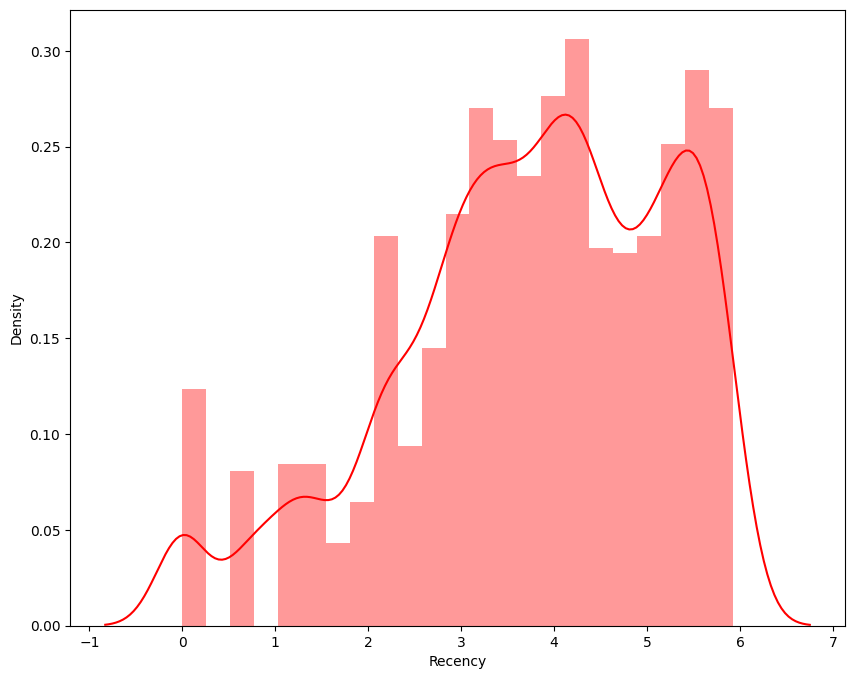

In [ ]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(10,8))
sns.distplot(Recency_Plot,color='r');

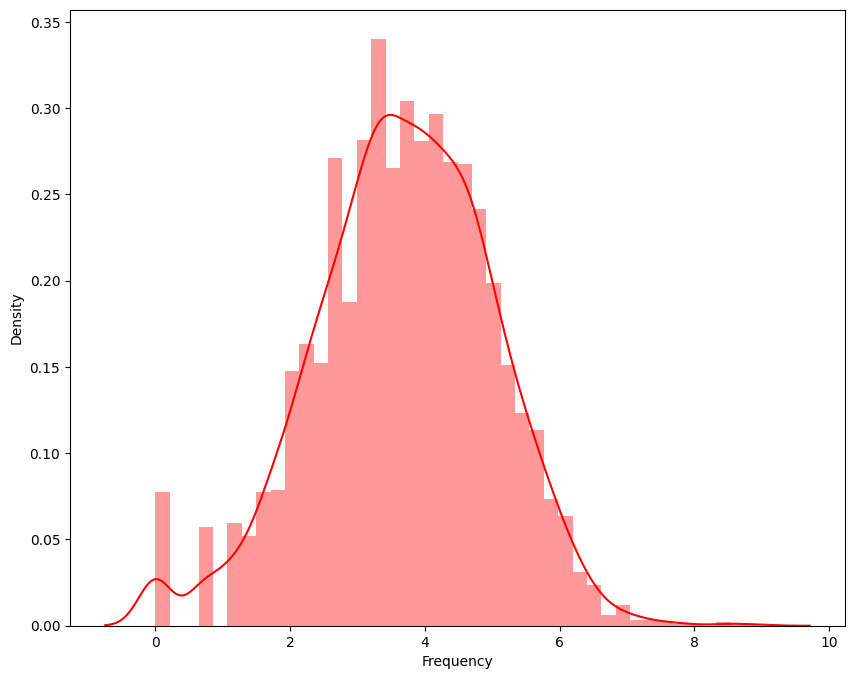

In [ ]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(10,8))
sns.distplot(Frequency_Plot,color='r');

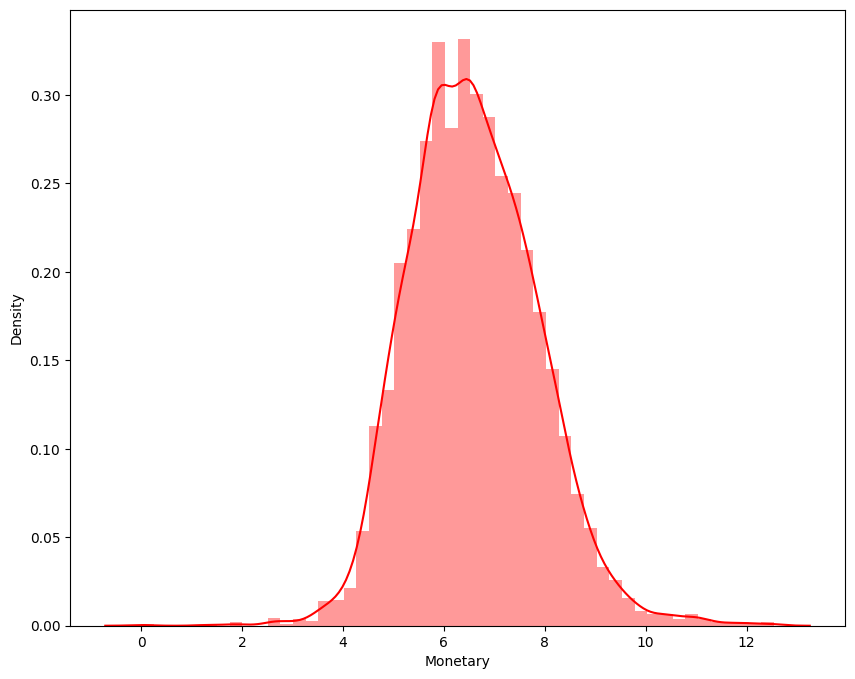

In [ ]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(10,8))
sns.distplot(Monetary_Plot,color='r');

*As we can see from the above plots, skewness has been removed from the data.*

In [ ]:
from sklearn import preprocessing
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)


Clustering

K-Means Clustering
Clustering is an unsupervised classification techinque to understand the groups of classes in the data. We use the K-means clustering algorithm to determine the ideal segments of customers.

KMeans requires the number of clusters to be specified during the model building process. To know the right number of clusters, methods such as silhouette analysis and elbow method can be used. These methods will help in selection of the optimum number of clusters.

In [ ]:
# Importing libraries necessary for clustering
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

Silhouette score method:



Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters.

Applying Silhouette Score Method on Recency and Monetary

In [ ]:
#silhoutte score
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4209365193373542
For n_clusters = 3, silhouette score is 0.3430075631053293
For n_clusters = 4, silhouette score is 0.36439258144803294
For n_clusters = 5, silhouette score is 0.3358014411737785
For n_clusters = 6, silhouette score is 0.3441342045771987
For n_clusters = 7, silhouette score is 0.3469240552765152
For n_clusters = 8, silhouette score is 0.3368711082993044
For n_clusters = 9, silhouette score is 0.34545771872200043
For n_clusters = 10, silhouette score is 0.3475846726012368
For n_clusters = 11, silhouette score is 0.338443719546538
For n_clusters = 12, silhouette score is 0.3429920792279393
For n_clusters = 13, silhouette score is 0.3421553201544832
For n_clusters = 14, silhouette score is 0.34446110304921557
For n_clusters = 15, silhouette score is 0.33632042821325786


Elbow Method:

Elbow is one of the most famous methods by which you can select the right value of k and boost your model performance. We also perform the hyperparameter tuning to chose the best value of k. It is an empirical method to find out the best value of k. it picks up the range of values and takes the best among them. It calculates the sum of the square of the points and calculates the average distance.

Applying Elbow Method on Recency and Monetary

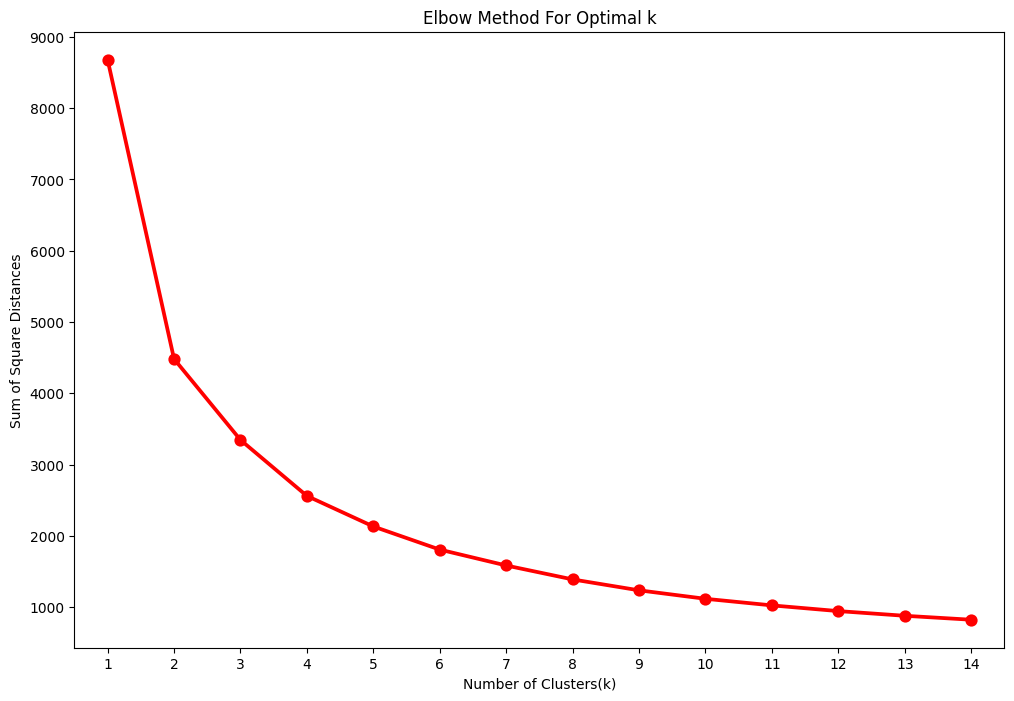

In [ ]:
#applying elbow method
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,8))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()),color='r')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

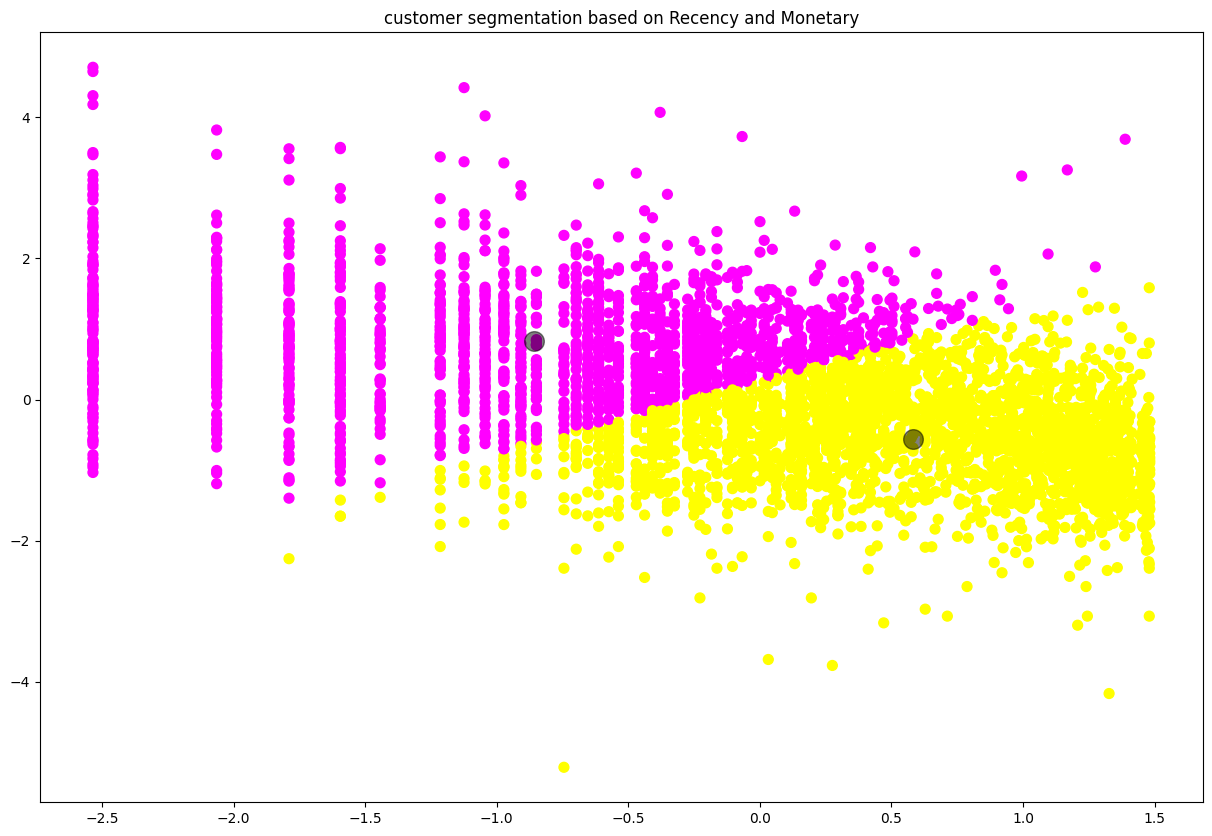

In [ ]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring_r')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

*Here we can see that, Customers are well separated when we cluster them by Recency and Monetary.*

DBSCAN Clustering:

DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. DBSCAN is a density-based clustering algorithm that works on the assumption that clusters are dense regions in space separated by regions of lower density.It groups ‘densely grouped’ data points into a single cluster.

Applying DBSCAN on Recency and Monetary

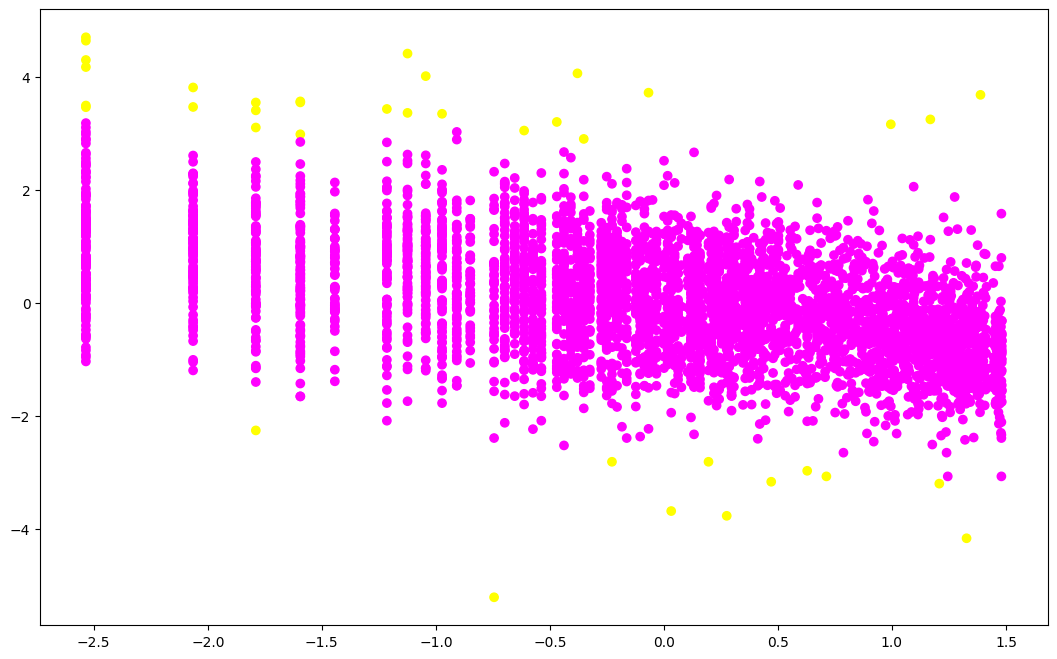

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred,cmap='spring_r');

*Here we can see that, Customers are separated when we cluster them by Recency and Monetary.*

Applying silhouette Score Method on Frquency and Monetary

In [ ]:
#silhouetee score
features_fre_mon=['Frequency_log','Monetary_log']
X_features_fre_mon=rfm_df[features_fre_mon].values
scaler_fre_mon=preprocessing.StandardScaler()
X_fre_mon=scaler_fre_mon.fit_transform(X_features_fre_mon)
X=X_fre_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4782608772260966
For n_clusters = 3, silhouette score is 0.40738956059188947
For n_clusters = 4, silhouette score is 0.37191535467697934
For n_clusters = 5, silhouette score is 0.34432174195628745
For n_clusters = 6, silhouette score is 0.35847820561732624
For n_clusters = 7, silhouette score is 0.33858034745517873
For n_clusters = 8, silhouette score is 0.3513883472352956
For n_clusters = 9, silhouette score is 0.34597156403258
For n_clusters = 10, silhouette score is 0.36038283962506934
For n_clusters = 11, silhouette score is 0.3687974617973926
For n_clusters = 12, silhouette score is 0.3546772528384014
For n_clusters = 13, silhouette score is 0.3606415818267618
For n_clusters = 14, silhouette score is 0.35574715320673433
For n_clusters = 15, silhouette score is 0.3616014247756163


Applying Elbow Method on Frequency and Monetary

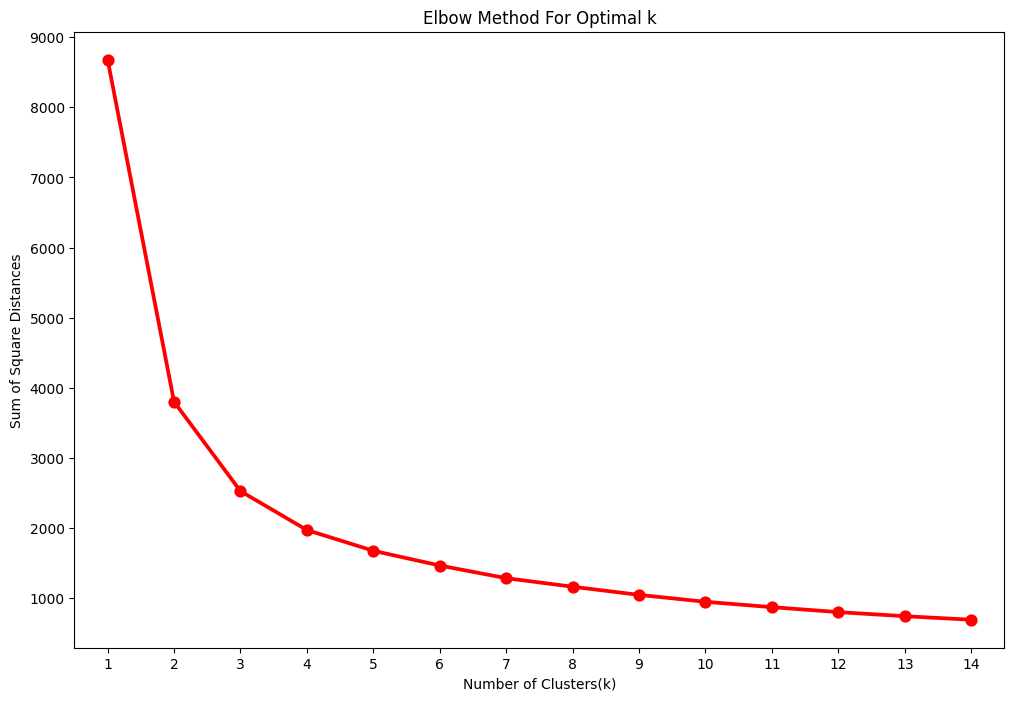

In [ ]:
from sklearn.cluster import KMeans
#applying elbow method
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,8))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()),color='r')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

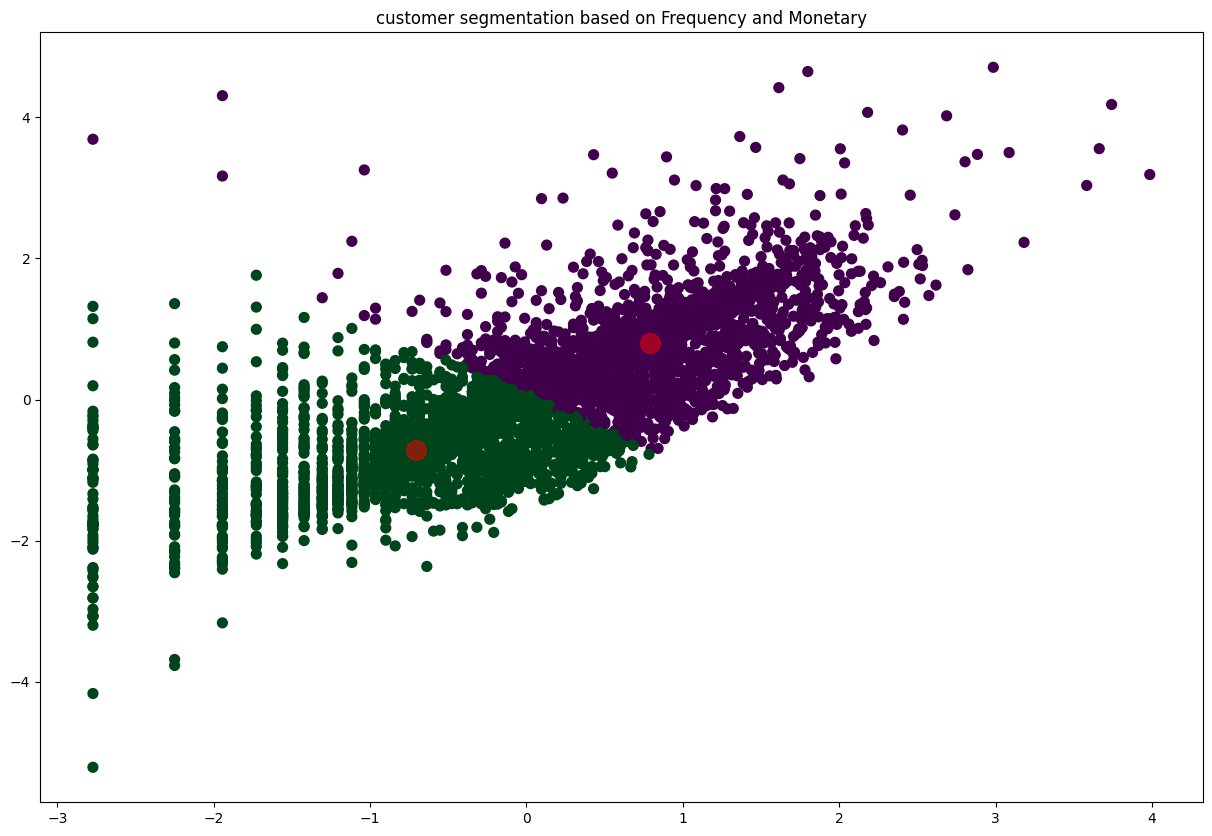

In [ ]:
#plotting graph based on frequency and monetary
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='PRGn')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

*Here we can see that, Customers are separated when we cluster them by Frequency and Monetary.*

Applying DBSCAN to Method on Frquency and Monetary

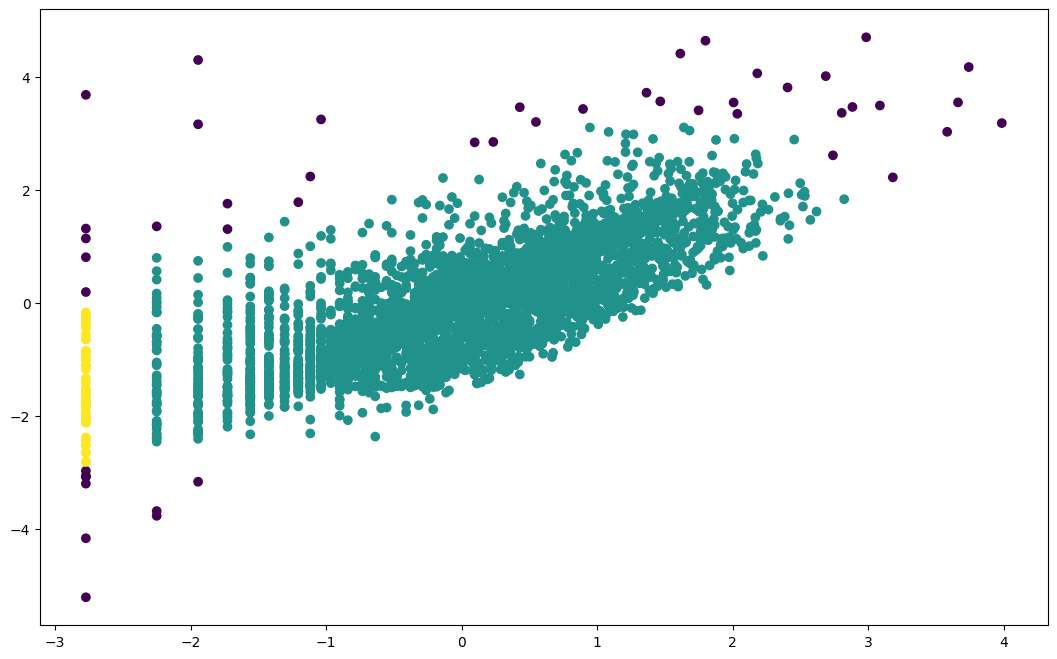

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred);

Applying Silhouette Method on Recency, Frequency and Monetary

In [ ]:
#scaling features
feature_vector=['Recency_log','Frequency_log','Monetary_log']
X_features=rfm_df[feature_vector].values
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X_features)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.3951770707909246
For n_clusters = 3 The average silhouette_score is : 0.30279916337210955
For n_clusters = 4 The average silhouette_score is : 0.29992482931084075
For n_clusters = 5 The average silhouette_score is : 0.2786751081078891
For n_clusters = 6 The average silhouette_score is : 0.27885758546690703
For n_clusters = 7 The average silhouette_score is : 0.2624001515465531
For n_clusters = 8 The average silhouette_score is : 0.26637235902499873
For n_clusters = 9 The average silhouette_score is : 0.2521940910165688
For n_clusters = 10 The average silhouette_score is : 0.26522589222059045


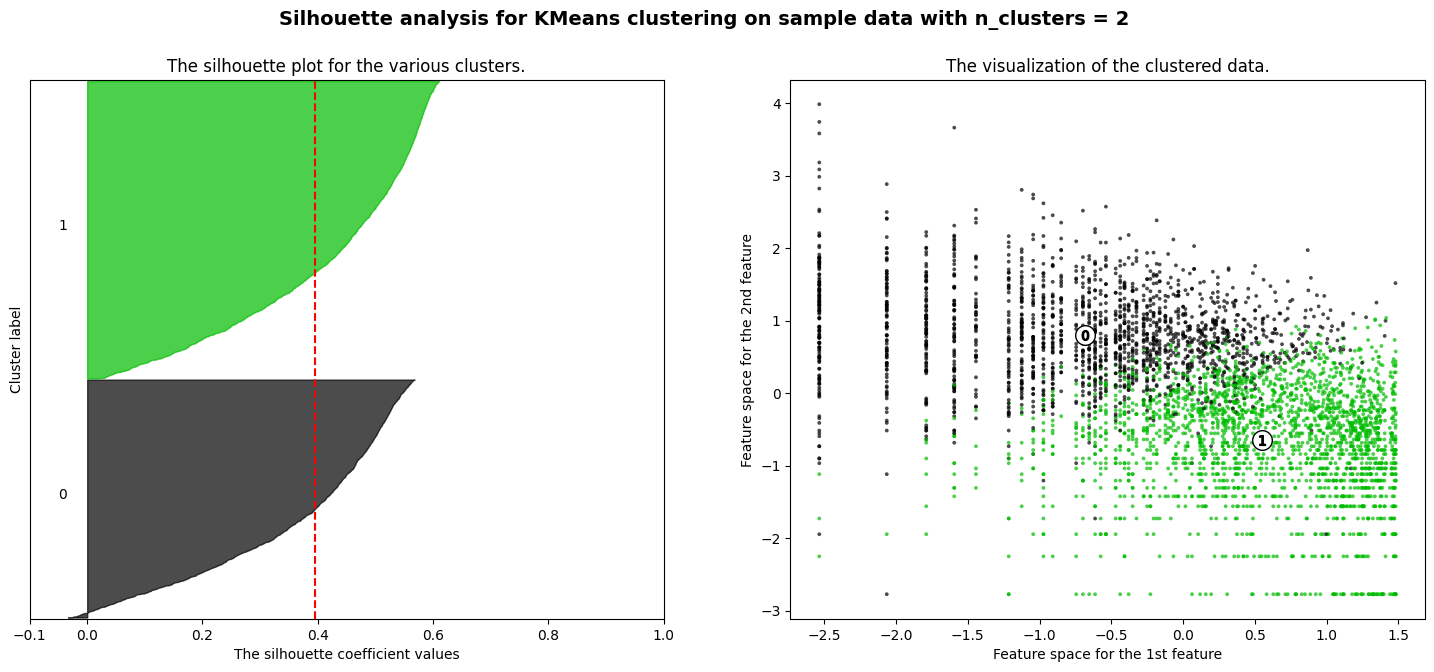

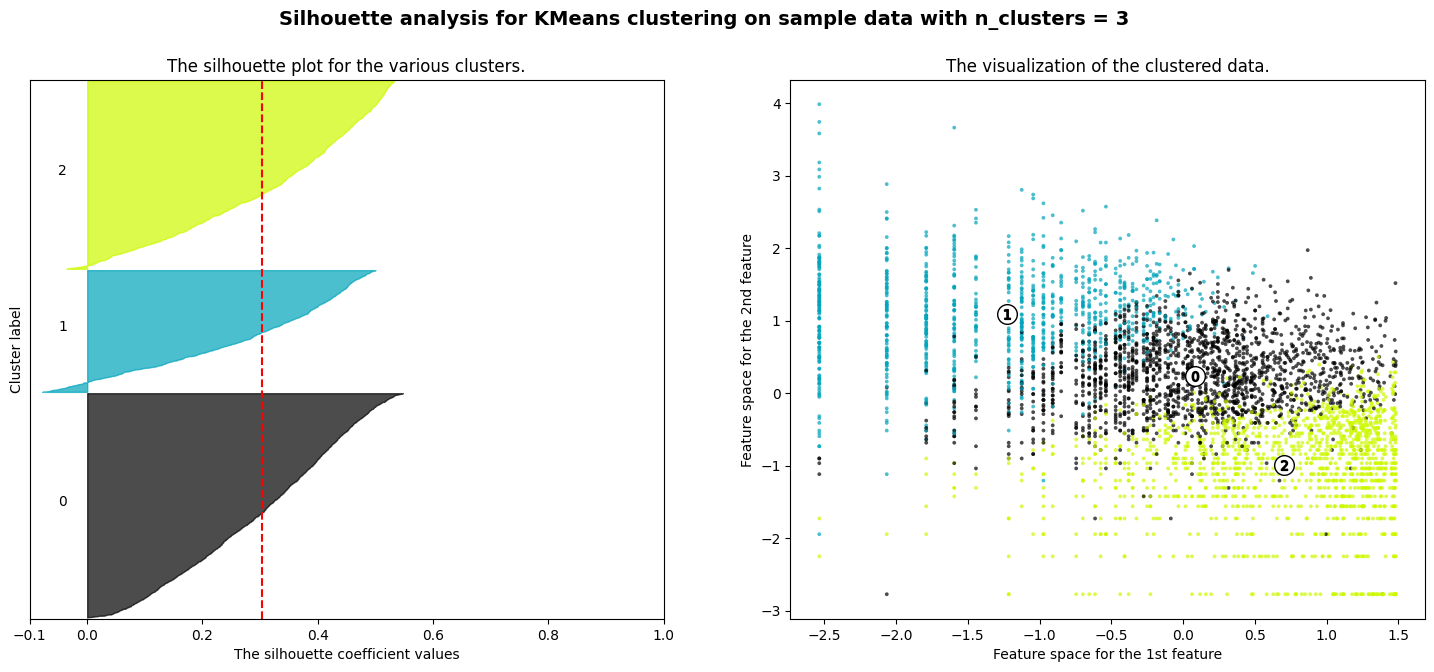

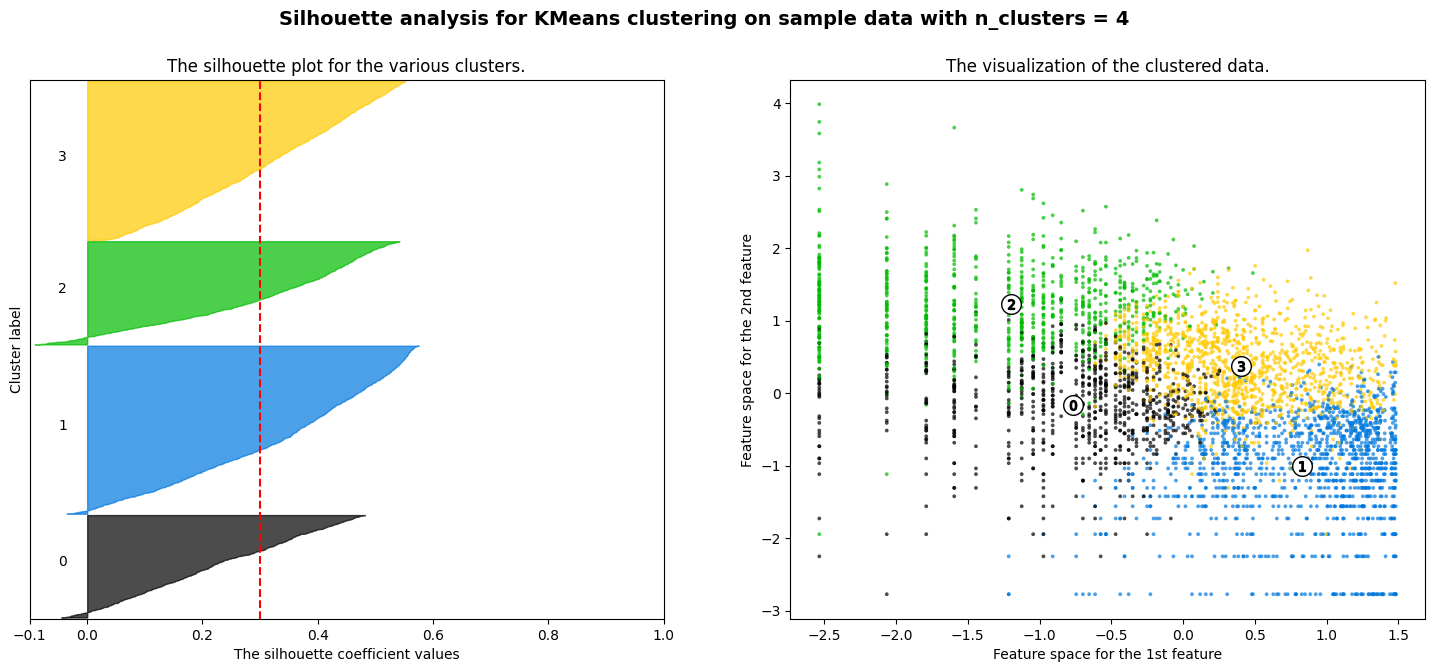

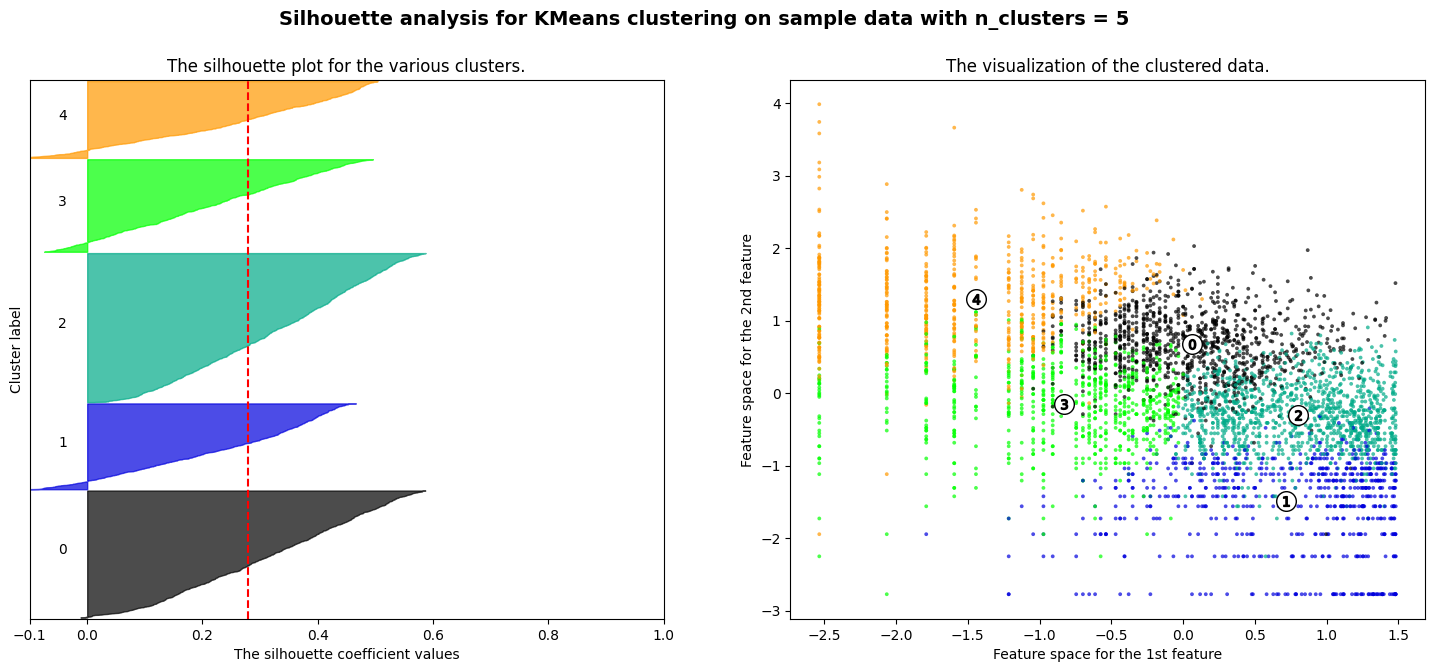

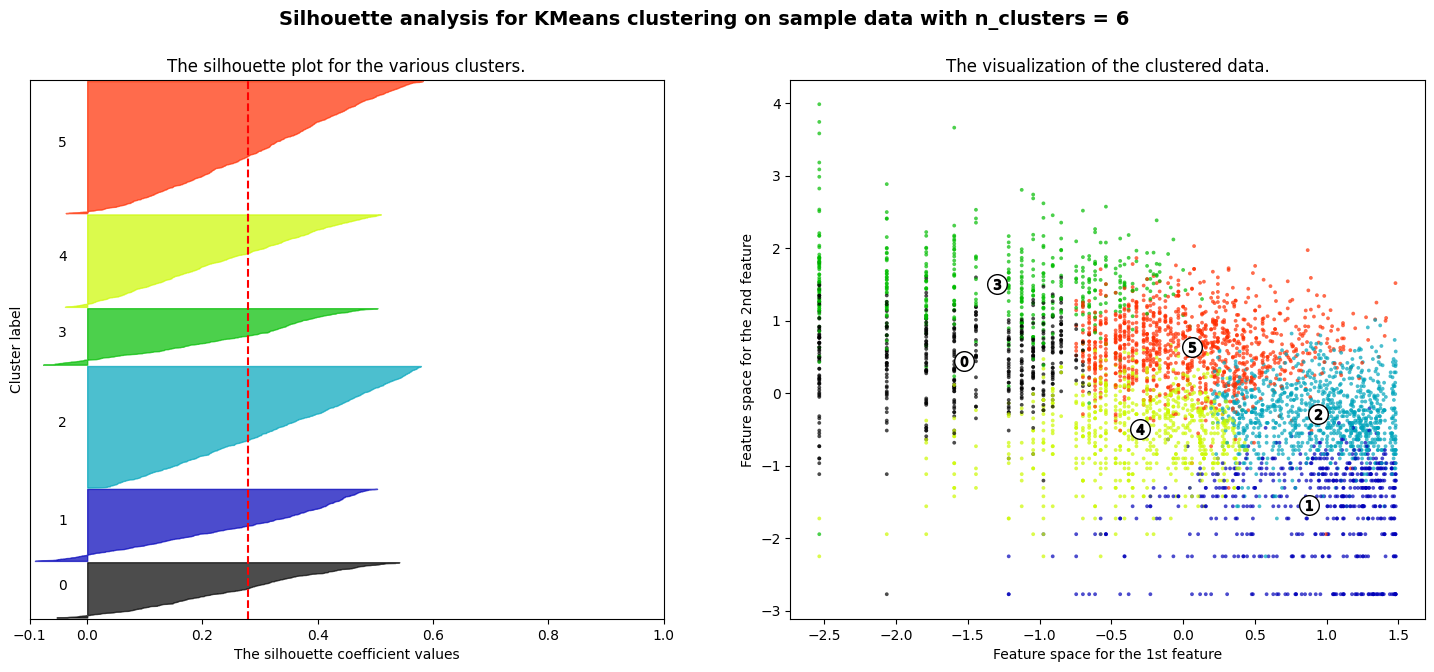

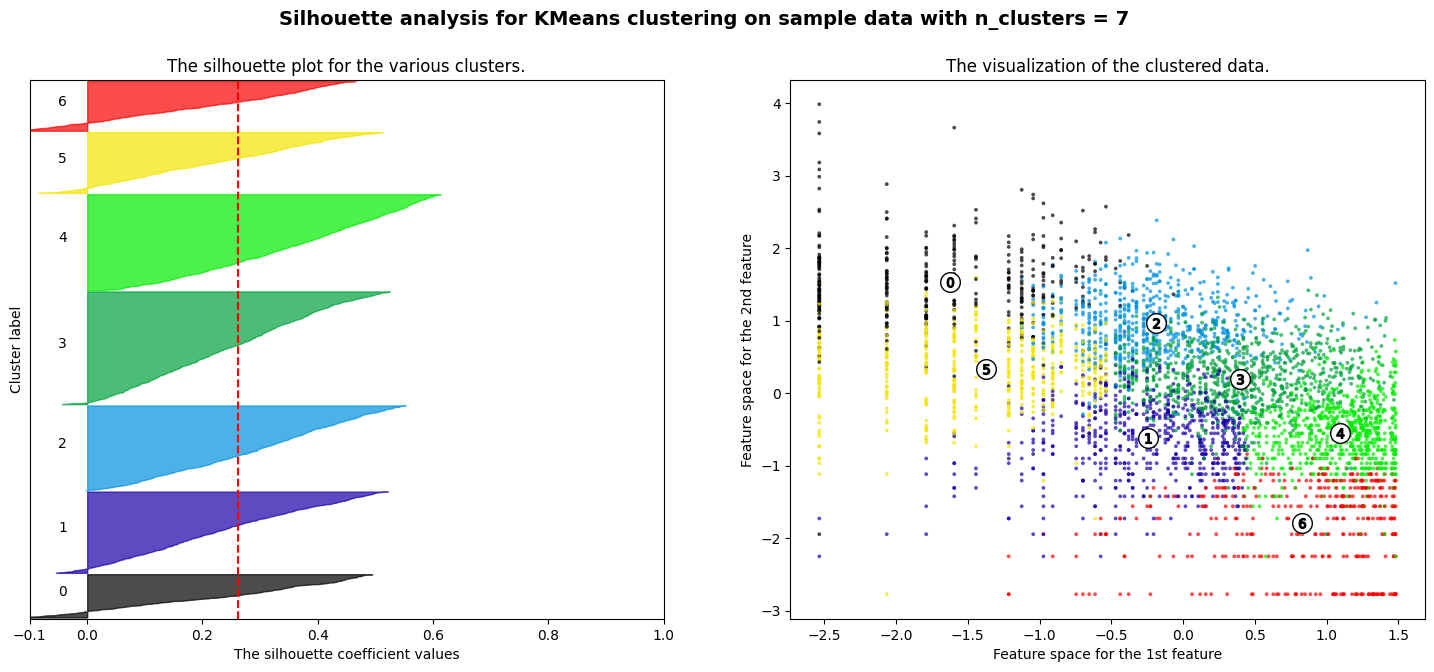

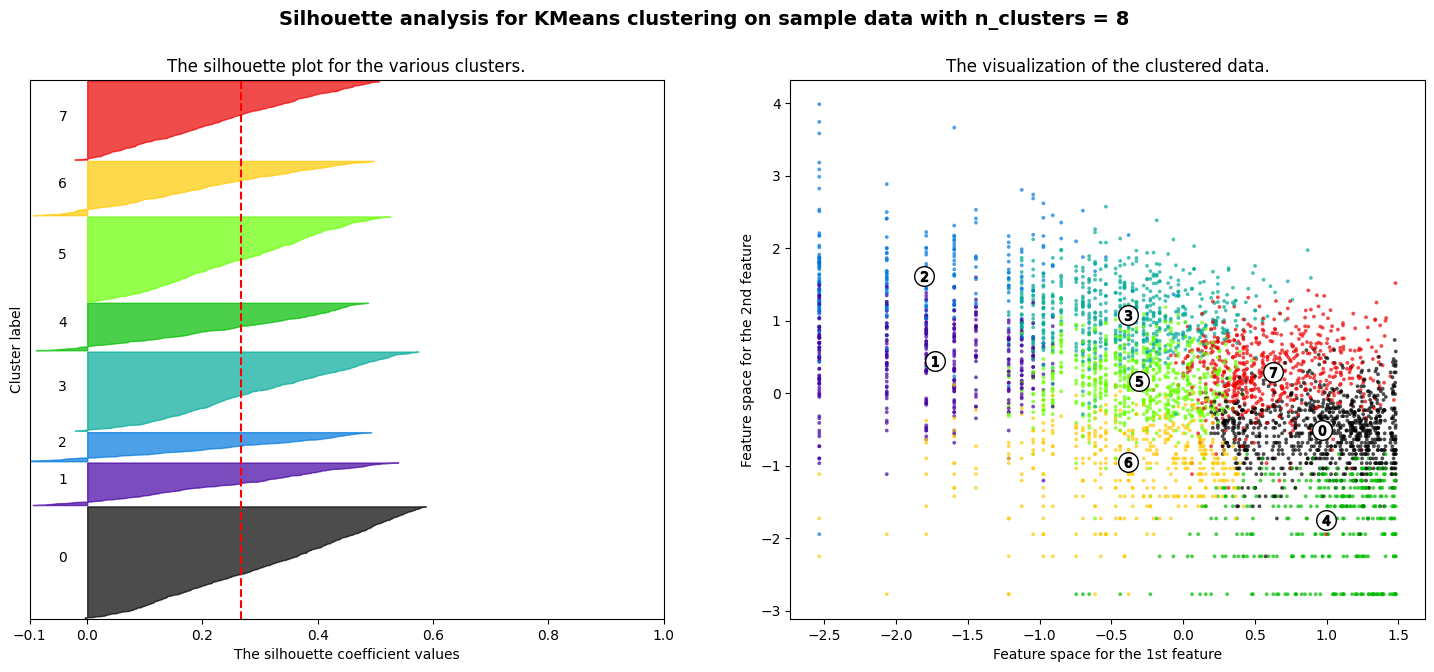

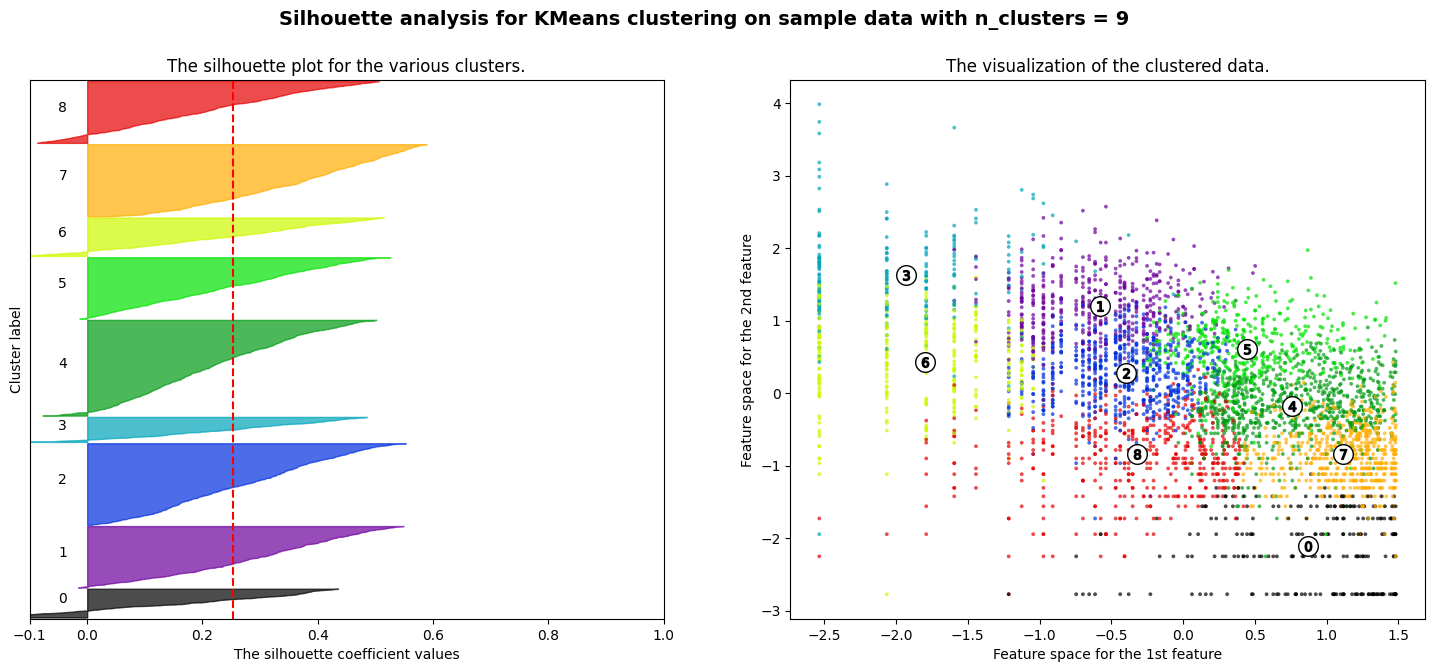

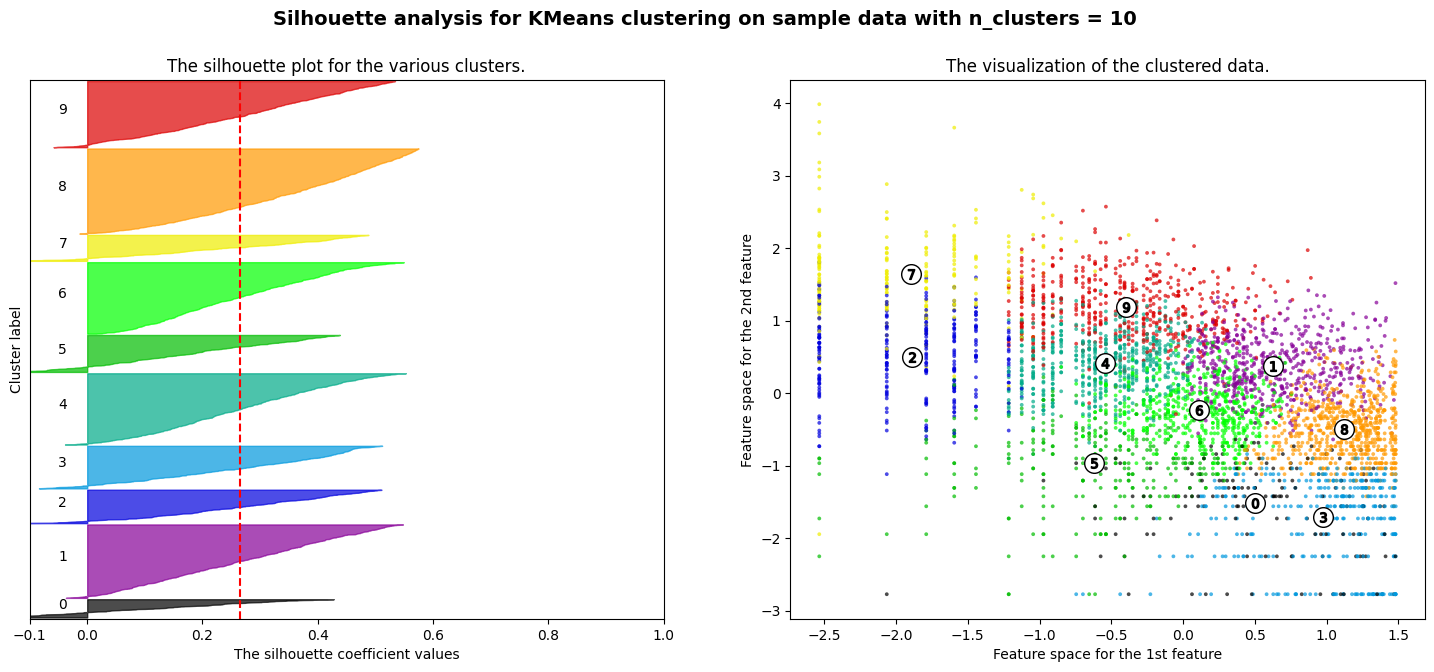

In [ ]:
#applying silhouette method on RFM
range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

*From the silhouette analysis, it is clearly understood that, 2 clusters are performing best. Hence, 2 clusters will be selected to build the KMeans model and classify the customers.*

In [ ]:
# KMeans with 2 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

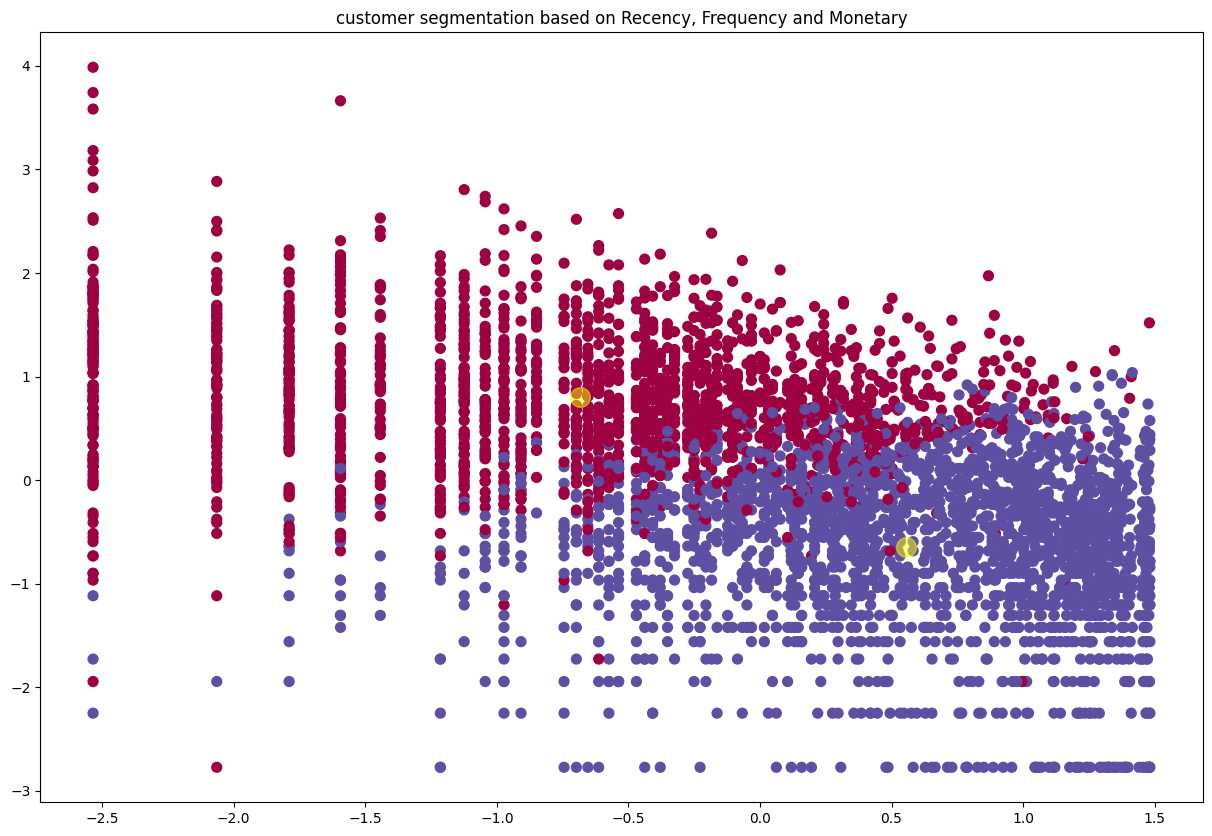

In [ ]:
#plotting figure
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency, Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='Spectral')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5);

*Here we can see that, Customers are separated when we cluster them by Recency, Frequency and Monetary.*

Applying Elbow Method on Recency, Frequency and Monetary

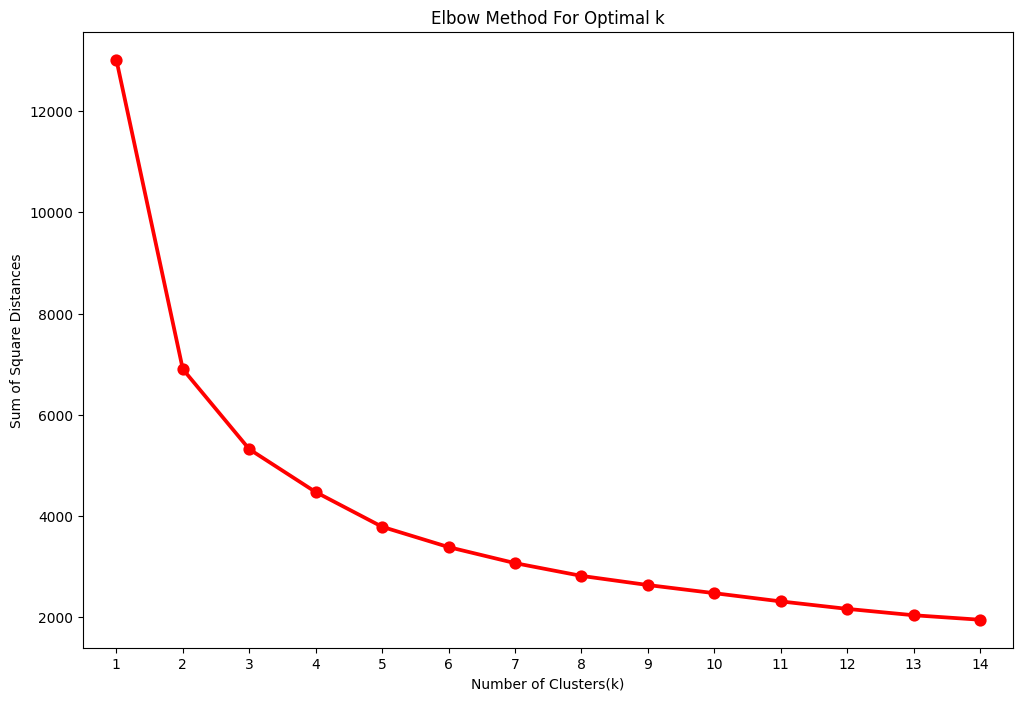

In [ ]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,8))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()),color='r')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Applying DBSCAN to Recency, Frequency and Monetary

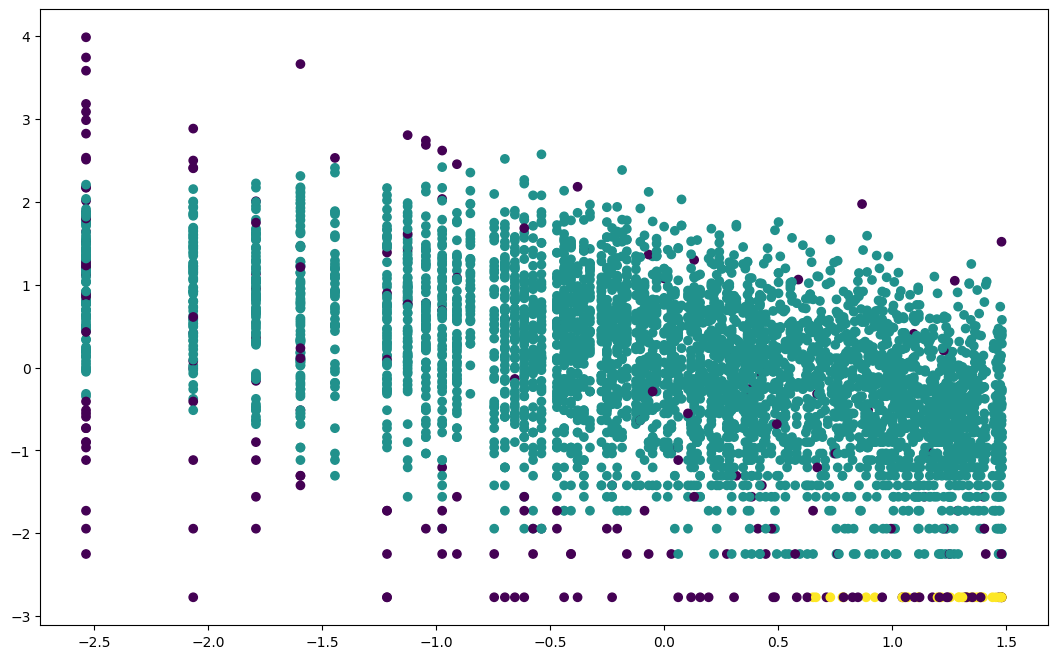

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred);

Here we can see that, Customers are well separated when we cluster them by Recency, Frequency and Monetary and optimal number of cluster is equal to 3.*

In [ ]:
#Performing K-Means Clustering with 2 clusters
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

#Find the clusters for the observation given in the dataset
rfm_df['Cluster'] = KMean_clust.labels_
#First 10 rows of the RFM dataframe
rfm_df.head(10)

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore  \
CustomerID                                                             
12346.0         325          1  77183.60  4  4  1      441         9   
12347.0           2        182   4310.00  1  1  1      111         3   
12348.0          75         31   1797.24  3  3  1      331         7   
12349.0          18         73   1757.55  2  2  1      221         5   
12350.0         310         17    334.40  4  4  3      443        11   
12352.0          36         85   2506.04  2  2  1      221         5   
12353.0         204          4     89.00  4  4  4      444        12   
12354.0         232         58   1079.40  4  2  2      422         8   
12355.0         214         13    459.40  4  4  3      443        11   
12356.0          22         59   2811.43  2  2  1      221         5   

            Recency_log  Frequency_log  Monetary_log  Cluster  
CustomerID                                                     
12346.0        5.783825       0.000000     11.253942        1  
12347.0        0.693147       5.204007      8.368693        0  
12348.0        4.317488       3.433987      7.494007        1  
12349.0        2.890372       4.290459      7.471676        0  
12350.0        5.736572       2.833213      5.812338        1  
12352.0        3.583519       4.442651      7.826459        0  
12353.0        5.318120       1.386294      4.488636        1  
12354.0        5.446737       4.060443      6.984161        1  
12355.0        5.365976       2.564949      6.129921        1  
12356.0        3.091042       4.077537      7.941449        0

In [ ]:
#checking customer belongs to cluter 1
rfm_df[rfm_df['Cluster'] ==1]

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore  \
CustomerID                                                             
12346.0         325          1  77183.60  4  4  1      441         9   
12348.0          75         31   1797.24  3  3  1      331         7   
12350.0         310         17    334.40  4  4  3      443        11   
12353.0         204          4     89.00  4  4  4      444        12   
12354.0         232         58   1079.40  4  2  2      422         8   
...             ...        ...       ... .. .. ..      ...       ...   
18277.0          58          8    110.38  3  4  4      344        11   
18278.0          73          9    173.90  3  4  4      344        11   
18280.0         277         10    180.60  4  4  4      444        12   
18281.0         180          7     80.82  4  4  4      444        12   
18282.0           7         12    178.05  1  4  4      144         9   

            Recency_log  Frequency_log  Monetary_log  Cluster  
CustomerID                                                     
12346.0        5.783825       0.000000     11.253942        1  
12348.0        4.317488       3.433987      7.494007        1  
12350.0        5.736572       2.833213      5.812338        1  
12353.0        5.318120       1.386294      4.488636        1  
12354.0        5.446737       4.060443      6.984161        1  
...                 ...            ...           ...      ...  
18277.0        4.060443       2.079442      4.703929        1  
18278.0        4.290459       2.197225      5.158480        1  
18280.0        5.624018       2.302585      5.196285        1  
18281.0        5.192957       1.945910      4.392224        1  
18282.0        1.945910       2.484907      5.182064        1  

[2408 rows x 12 columns]

Hierarchical clustering

Hierarchical clustering is an unsupervised clustering algorithm which involves creating clusters that have predominant ordering from top to bottom.

Dendogram

A Dendrogram is a type of tree diagram showing hierarchical relationships between different sets of data.

Dendogram to find the optimal number of clusters

Here, we can see No. of Clusters = 2


In [ ]:
# Fitting hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

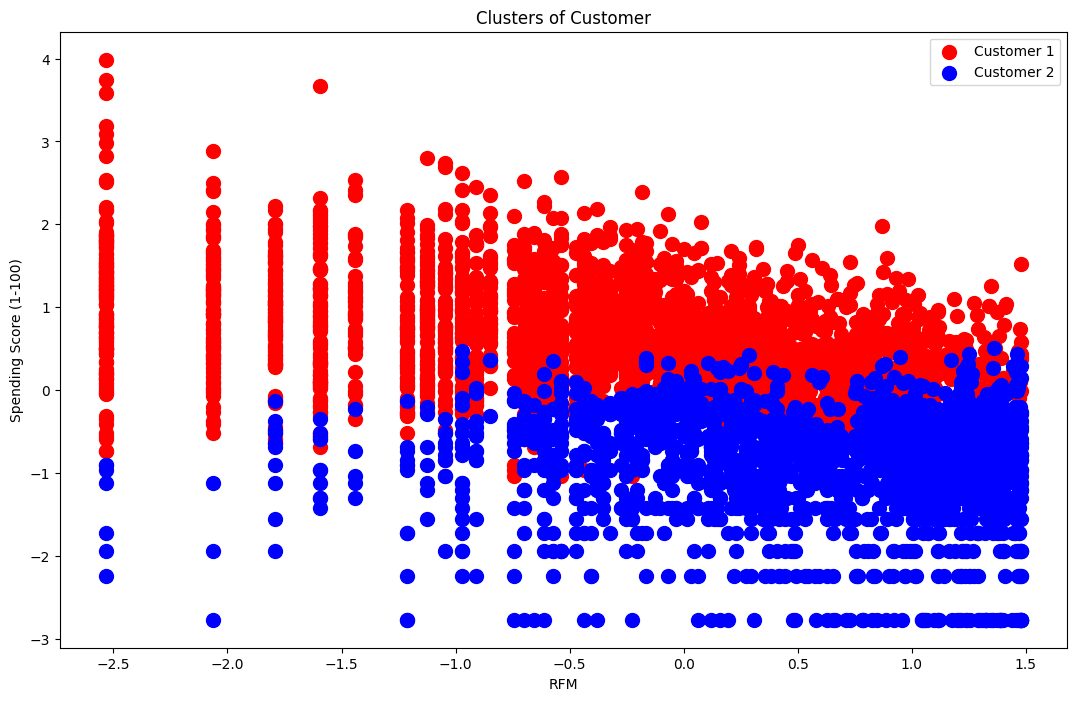

In [ ]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')

plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
#let's check mean values of the cluster for recency, frequnecy and monetary

rfm_df.groupby('Cluster').agg({'Recency':'mean',
                               'Frequency':'mean',
                               'Monetary':'mean'})

Recency   Frequency     Monetary
Cluster                                     
0         31.025375  175.181253  4029.611404
1        140.985465   24.771179   469.364320

We can see from above that the customer belongs to cluster 1 are premium customers and we can keep them in comapny's loyalty program and for the customer belongs to cluster 0 we can provide them offer or create some strategies for them so that they will do more transaction with us.

Summary

In [ ]:
from prettytable import PrettyTable 
  
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(['Sr No.',"Model_Name",'Data', "Optimal_Number_of_cluster"]) 
  
# Add rows 
myTable.add_row(['1',"K-Means with silhouette_score ", "RM", "2"]) 
myTable.add_row(['2',"K-Means with Elbow methos  ", "RM", "2"])
myTable.add_row(['3',"DBSCAN ", "RM", "2"]) 
myTable.add_row(['4',"K-Means with silhouette_score ", "FM", "2"]) 
myTable.add_row(['5',"K-Means with Elbow methos  ", "FM", "2"])
myTable.add_row(['6',"DBSCAN ", "FM", "2"])

myTable.add_row(['7',"K-Means with silhouette_score ", "RFM", "2"]) 
myTable.add_row(['8',"K-Means with Elbow methos  ", "RFM", "2"])
myTable.add_row(['9',"DBSCAN ", "RFM", "3"])
myTable.add_row(['10',"Hierarchical clustering  ", "RFM", "2"])

print(myTable)

+--------+--------------------------------+------+---------------------------+
| Sr No. |           Model_Name           | Data | Optimal_Number_of_cluster |
+--------+--------------------------------+------+---------------------------+
|   1    | K-Means with silhouette_score  |  RM  |             2             |
|   2    |  K-Means with Elbow methos     |  RM  |             2             |
|   3    |            DBSCAN              |  RM  |             2             |
|   4    | K-Means with silhouette_score  |  FM  |             2             |
|   5    |  K-Means with Elbow methos     |  FM  |             2             |
|   6    |            DBSCAN              |  FM  |             2             |
|   7    | K-Means with silhouette_score  | RFM  |             2             |
|   8    |  K-Means with Elbow methos     | RFM  |             2             |
|   9    |            DBSCAN              | RFM  |             3             |
|   10   |   Hierarchical clustering      | RFM  |  

In [ ]:
pip install https://pypi.python.org/packages/source/P/PrettyTable/prettytable-0.7.2.tar.bz2


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13705 sha256=3d946d77e654c48ff2193de9ad00cc89cdd75188004b69672e8a8170424b42b6
  Stored in directory: c:\users\care2\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local\pip\cache\wheels\48\e8\75\38a163e535dba383b50bd3a9699fc9bf655f528371e7f9d3fc
Successfully built prettytable
  Attempting uninstall: prettytable
    Found existing installation: prettytable 3.9.0
    Uninstalling prettytable-3.9.0:
      Successfully uninstalled prettytable-3.9.0



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\care2\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


#Conclusion

*This project mainly focused on developing customer segments for a UK based online store, selling unique all occasion gifts.*

*Using a recency, frequency and monetary(RFM) analysis, the customers have been segmented into various clusters and got a silhoutte score of 0.39 for two clusters*

*By applying different clustering algorithm to our dataset, we get the optimal number of cluster is equal to 2.*

*The business can focus on these different clusters and provide customer with services of each sector in a different way, which would not only benefit the customers but also the business at large.*